In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models_keras
import losses_metrics
import cv2
import os
import imageio as io
import keras.backend as K
from keras import *
from keras.optimizers import Adam, RMSprop
from keras.layers import *
import tensorflow as tf
import tensorflow_addons as tfa

In [2]:
# Always run this otherwise TF crashes
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
#filter_1 is vertical (N,1)
#filter_2 is horizontal (1,M)
def UNET(image_width, image_height, image_channels, filter_multiplier, filter_size, filter_1, filter_2, epochs):
    inputs = Input(shape=(image_width, image_height, image_channels))
    bn = BatchNormalization()(inputs)

    #1
    conv1 = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(bn)
    conv1 = Activation('relu')(conv1)
    conv1_v = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv1)
    conv1_h = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv1)
    conv1 = Add()([conv1_v, conv1_h])
    conv1 = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv1)
    conv1 = Activation('relu')(conv1)
    conv1_v = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv1)
    conv1_h = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv1)
    conv1 = Add()([conv1_v, conv1_h])
    conv2 = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_size,filter_size), strides=(2,2), padding='same')(conv1)
    conv2 = Activation('relu')(conv2)


    #2
    conv3 = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv2)
    conv3 = Activation('relu')(conv3)
    conv3_v = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv3)
    conv3_h = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv3)
    conv3 = Add()([conv3_v, conv3_h])
    conv3 = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv3)
    conv3 = Activation('relu')(conv3)
    conv3_v = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv3)
    conv3_h = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv3)
    conv3 = Add()([conv3_v, conv3_h])
    conv4 = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_size,filter_size), strides=(2,2), padding='same')(conv3)
    conv4 = Activation('relu')(conv4)


    #3
    conv5 = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv4)
    conv5 = Activation('relu')(conv5)
    conv5_v = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv5)
    conv5_h = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv5)
    conv5 = Add()([conv5_v, conv5_h])
    conv5 = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv5)
    conv5 = Activation('relu')(conv5)
    conv5_v = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv5)
    conv5_h = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv5)
    conv5 = Add()([conv5_v, conv5_h])
    conv6 = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_size,filter_size), strides=(2,2), padding='same')(conv5)
    conv6 = Activation('relu')(conv6)


    #4
    conv7 = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv6)
    conv7 = Activation('relu')(conv7)
    conv7_v = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv7)
    conv7_h = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv7)
    conv7 = Add()([conv7_v, conv7_h])
    conv7 = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv7)
    conv7 = Activation('relu')(conv7)
    conv7_v = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv7)
    conv7_h = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv7)
    conv7 = Add()([conv7_v, conv7_h])
    conv8 = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_size,filter_size), strides=(2,2), padding='same')(conv7)
    conv8 = Activation('relu')(conv8)


    #5
    conv9 = Conv2D(filters=16*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv8)
    conv9 = Activation('relu')(conv9)
    conv9_v = Conv2D(filters=16*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv9)
    conv9_h = Conv2D(filters=16*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv9)
    conv9 = Add()([conv9_v, conv9_h])
    conv9 = Conv2D(filters=16*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv9)
    conv9 = Activation('relu')(conv9)
    conv9_v = Conv2D(filters=16*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv9)
    conv9_h = Conv2D(filters=16*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv9)
    conv9 = Add()([conv9_v, conv9_h])
#     print(K.int_shape(conv9))

    #6
    conv10 = BatchNormalization()(conv9)
    deconv1= Conv2DTranspose(filters=8*filter_multiplier, kernel_size=(filter_size,filter_size), strides=(2,2), padding='same')(conv10)
#     print(K.int_shape(deconv1),K.int_shape(conv7))
    merge1 = concatenate([deconv1, conv7])
    conv10 = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(merge1)
    conv10 = Activation('relu')(conv10)
    conv10_v = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv10)
    conv10_h = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv10)
    conv10 = Add()([conv10_v, conv10_h])
    conv10 = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv10)
    conv10 = Activation('relu')(conv10)
    conv10_v = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv10)
    conv10_h = Conv2D(filters=8*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv10)
    conv10 = Add()([conv10_v, conv10_h])
    # 

    #7
    conv11 = BatchNormalization()(conv10)
    deconv2= Conv2DTranspose(filters=4*filter_multiplier, kernel_size=(filter_size,filter_size), strides=(2,2), padding='same')(conv11)
#     print(K.int_shape(deconv2),K.int_shape(conv5))
    merge2 = concatenate([deconv2, conv5])
    conv11 = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(merge2)
    conv11 = Activation('relu')(conv11)
    conv11_v = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv11)
    conv11_h = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv11)
    conv11 = Add()([conv11_v, conv11_h])
    conv11 = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv11)
    conv11 = Activation('relu')(conv11)
    conv11_v = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv11)
    conv11_h = Conv2D(filters=4*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv11)
    conv11 = Add()([conv11_v, conv11_h])

    #8
    conv12 = BatchNormalization()(conv11)
    deconv3= Conv2DTranspose(filters=2*filter_multiplier, kernel_size=(filter_size,filter_size), strides=(2,2), padding='same')(conv12)
    merge3 = concatenate([deconv3, conv3])
    conv12 = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(merge3)
    conv12 = Activation('relu')(conv12)
    conv12_v = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv12)
    conv12_h = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv12)
    conv12 = Add()([conv12_v, conv12_h])
    conv12 = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv12)
    conv12 = Activation('relu')(conv12)
    conv12_v = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv12)
    conv12_h = Conv2D(filters=2*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv12)
    conv12 = Add()([conv12_v, conv12_h])

    #9
    conv13 = BatchNormalization()(conv12)
    deconv4= Conv2DTranspose(filters=1*filter_multiplier, kernel_size=(filter_size,filter_size), strides=(2,2), padding='same')(conv13)
    merge4 = concatenate([deconv4, conv1])
    conv13 = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(merge4)
    conv13 = Activation('relu')(conv13)
    conv13_v = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv13)
    conv13_h = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv13)
    conv13 = Add()([conv13_v, conv13_h])
    conv13 = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_size,filter_size), padding='same')(conv13)
    conv13 = Activation('relu')(conv13)
    conv13_v = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_1), padding='same', activation='relu')(conv13)
    conv13_h = Conv2D(filters=1*filter_multiplier, kernel_size=(filter_2), padding='same', activation='relu')(conv13)
    conv13 = Add()([conv13_v, conv13_h])

    #10
    output = Conv2D(filters = 1, kernel_size=(1,1),activation='sigmoid')(conv13)
    
    model = Model(inputs, output)
    return model

In [4]:
#filter_1 is vertical (N,1)
#filter_2 is horizontal (1,M)
unet = UNET(128,128,3,16,3, (5,1), (1,5), 50)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

# Data

In [5]:
def wbce(y_true, y_pred) :
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    weight1 = (524288.0-K.sum(y_true))/(K.sum(y_true))
    weight0 = 1
    y_true = K.clip(y_true, K.epsilon(), 1-K.epsilon())
    y_pred = K.clip(y_pred, K.epsilon(), 1-K.epsilon())
    logloss = -(y_true * K.log(y_pred) * weight1 + (1 - y_true) * K.log(1 - y_pred) * weight0 )
    return K.mean( logloss, axis=-1)

In [6]:
def dice_coeff(y_true, y_pred):
  
  smooth = 1
  y_true_f = tf.reshape(y_true, [-1])
  y_pred_f = tf.reshape(y_pred, [-1])

  intersection = tf.reduce_sum(y_true_f * y_pred_f)
  score = (2 * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
  return score

In [7]:
def dice_loss(y_true, y_pred):
  
  loss = 1 - dice_coeff(y_true, y_pred)
  return loss

In [8]:
def bce_dice_loss(y_true, y_pred):

  loss = tf.losses.binary_crossentropy(y_true,y_pred) + (dice_loss(y_true, y_pred))
  return loss

In [9]:
def IoU(y_true, y_pred):
  intersection = y_true*y_pred
  not_true     = 1 - y_true
  union        = y_true + (not_true * y_pred)
  score        = (K.sum(intersection)) / (K.sum(union))
  return score

In [10]:
def IoU_loss(y_true, y_pred):
    return 1 - IoU(y_true, y_pred)

In [11]:
def focal_loss(y_true, y_pred, gamma=2., alpha=.25):
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    loss = -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return loss


In [12]:
focal_loss = tfa.losses.SigmoidFocalCrossEntropy()

In [13]:
def pr_rec_f1(y_test, y_pred, threshold=0):

    if threshold==None:
        tp = np.sum(y_test*(y_pred))
        tn = np.sum((1-y_test)*((1-y_pred)))
        fp = np.sum((1-y_test)*(y_pred))
        fn = np.sum((y_test)*((1-y_pred)))

    if threshold!=None:
        tp = np.sum(y_test*(y_pred>threshold)*1)
        tn = np.sum((1-y_test)*((1-y_pred)>threshold)*1)
        fp = np.sum((1-y_test)*(y_pred>threshold)*1)
        fn = np.sum((y_test)*((1-y_pred)>threshold)*1)

    pr  = (tp/(tp+fp))
    rec = (tp/(tp+fn))
    f1  = ((2*pr*rec)/(pr+rec))
    tnr = (tn/(tn+fp))
    fpr = (fp/(fp+tn))

    return pr, rec, f1, tnr, fpr

In [14]:
# def dictionary():
name_            = []
params_          = []
loss_            = []
IoU_             = []
dice_loss_       = []
bce_             = []
mse_             = []
wbce_            = []
focal_           = []
val_loss_        = []
val_IoU_         = []
val_dice_loss_   = []
val_bce_         = []
val_mse_         = []
val_wbce_        = []
val_focal_       = []
test_loss_       = []
test_IoU_        = []
test_dice_loss_  = []
test_bce_        = []
test_mse_        = []
test_wbce_       = []
test_focal_      = []
precision_       = []
recall_          = []
F1_              = []
TNR_             = []
FPR_             = []

dict_1 = {'name': name_,
          'Parameters':params_,
          'Loss':loss_,
          'IoU':IoU_,
          'Dice Loss':dice_loss_,
          'Binary Cross Entropy': bce_,
          'Mean Squared Error': mse_,
          'Weighted Binary Cross Entropy': wbce_,
          'Focal Loss': focal_,
          'Validation Loss':val_loss_,
          'Validation IoU':val_IoU_,
          'Validation Dice Loss':val_dice_loss_,
          'Validation Binary Cross Entropy': val_bce_,
          'Validation Mean Squared Error': val_mse_,
          'Validation Weighted Binary Cross Entropy': val_wbce_,
          'Validation Focal Loss': val_focal_,
          'Test Loss':test_loss_,
          'Test IoU':test_IoU_,
          'Test Dice Loss':test_dice_loss_,
          'Test Binary Cross Entropy': test_bce_,
          'Test Mean Squared Error': test_mse_,
          'Test Weighted Binary Cross Entropy': test_wbce_,
          'Test Focal Loss': test_focal_,
          'Precision':precision_,
          'Recall':recall_,
          'F1-Score':F1_,
          'TNR':TNR_,
          'FPR':FPR_}
#     return dict_1

In [15]:
X_train = np.load(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\Data Numpy arrays\float32\X_train_5000.npy")
Y_train = np.load(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\Data Numpy arrays\float32\Y_train_5000.npy")

X_test  = np.load(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\Data Numpy arrays\float32\X_test_2000.npy")
Y_test  = np.load(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\Data Numpy arrays\float32\Y_test_2000.npy")

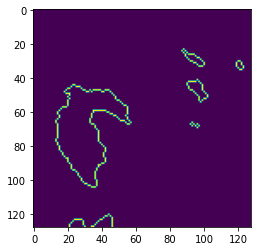

In [16]:
plt.imshow(Y_train[100])

In [17]:
Y_train = Y_train.reshape(-1,128,128,1)
Y_test  = Y_test.reshape(-1,128,128,1)

In [18]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5000, 128, 128, 3),
 (2000, 128, 128, 3),
 (5000, 128, 128, 1),
 (2000, 128, 128, 1))

# Loss Function: Kaggle Loss Conv2D(5x1)

In [19]:
K.clear_session()

In [20]:
#filter_1 is vertical (N,1)
#filter_2 is horizontal (1,M)
unet = UNET(128, 128, 3, 16, 3, (5,1), (1,5), 50)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [21]:
kaggle_loss = losses_metrics.weighted_bce_dice_loss_kaggle

In [22]:
def bce_dice_IoU(y_true, y_pred):

  loss = tf.losses.binary_crossentropy(y_true,y_pred) + (dice_loss(y_true, y_pred)) + (IoU_loss(y_true, y_pred))
  return loss
focal_loss = tfa.losses.SigmoidFocalCrossEntropy()

In [23]:
name = 'Kaggle Loss'
opt = Adam(learning_rate=0.003)
unet.compile(optimizer=opt,
             loss=kaggle_loss,
             metrics=[IoU,dice_loss,'bce','mse', wbce, focal_loss])
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [24]:
history = unet.fit(X_train, Y_train, epochs = 50, validation_split=0.2, batch_size=32)

Epoch 1/50
125/125 [==============================] - 33s 190ms/step - loss: 1.0808 - IoU: 0.0229 - dice_loss: 0.9563 - bce: 0.1176 - mse: 0.0266 - wbce: 3.2776 - sigmoid_focal_crossentropy: 0.0149 - val_loss: 1.0929 - val_IoU: 0.0080 - val_dice_loss: 0.9840 - val_bce: 0.0572 - val_mse: 0.0105 - val_wbce: 4.6720 - val_sigmoid_focal_crossentropy: 0.0111
Epoch 2/50
125/125 [==============================] - 22s 177ms/step - loss: 0.8092 - IoU: 0.1284 - dice_loss: 0.7741 - bce: 0.0667 - mse: 0.0159 - wbce: 2.8600 - sigmoid_focal_crossentropy: 0.0230 - val_loss: 1.0915 - val_IoU: 0.0153 - val_dice_loss: 0.9699 - val_bce: 0.0560 - val_mse: 0.0104 - val_wbce: 5.3650 - val_sigmoid_focal_crossentropy: 0.0131
Epoch 3/50
125/125 [==============================] - 22s 177ms/step - loss: 0.6995 - IoU: 0.1910 - dice_loss: 0.6807 - bce: 0.0581 - mse: 0.0133 - wbce: 2.6217 - sigmoid_focal_crossentropy: 0.0215 - val_loss: 0.8066 - val_IoU: 0.1684 - val_dice_loss: 0.7129 - val_bce: 0.0525 - val_mse: 0.

125/125 [==============================] - 23s 186ms/step - loss: 0.4542 - IoU: 0.4048 - dice_loss: 0.4252 - bce: 0.0366 - mse: 0.0079 - wbce: 1.7382 - sigmoid_focal_crossentropy: 0.0155 - val_loss: 0.4783 - val_IoU: 0.3790 - val_dice_loss: 0.4515 - val_bce: 0.0377 - val_mse: 0.0083 - val_wbce: 1.8434 - val_sigmoid_focal_crossentropy: 0.0160
Epoch 48/50
125/125 [==============================] - 23s 185ms/step - loss: 0.4552 - IoU: 0.4023 - dice_loss: 0.4278 - bce: 0.0371 - mse: 0.0080 - wbce: 1.7362 - sigmoid_focal_crossentropy: 0.0156 - val_loss: 0.4994 - val_IoU: 0.3311 - val_dice_loss: 0.5036 - val_bce: 0.0480 - val_mse: 0.0105 - val_wbce: 1.8777 - val_sigmoid_focal_crossentropy: 0.0225
Epoch 49/50
125/125 [==============================] - 23s 184ms/step - loss: 0.4578 - IoU: 0.4008 - dice_loss: 0.4295 - bce: 0.0369 - mse: 0.0080 - wbce: 1.7582 - sigmoid_focal_crossentropy: 0.0155 - val_loss: 0.4794 - val_IoU: 0.4036 - val_dice_loss: 0.4263 - val_bce: 0.0401 - val_mse: 0.0080 - va

In [25]:
l,i,j,k,l,m,n = unet.evaluate(X_test,Y_test)

Y_pred = unet.predict(X_test).squeeze()
a,b,c,d,e=pr_rec_f1(Y_test.squeeze(),Y_pred,threshold=0.5)

name_.append(name)
params_.append(unet.count_params())
loss_.append(history.history['loss'][-1]) 
IoU_.append(history.history['IoU'][-1])
dice_loss_.append(history.history['dice_loss'][-1])
bce_.append(history.history['bce'][-1]) 
mse_.append(history.history['mse'][-1])
wbce_.append(history.history['wbce'][-1])
focal_.append(history.history['sigmoid_focal_crossentropy'][-1])
val_loss_.append(history.history['val_loss'][-1])
val_IoU_.append(history.history['val_IoU'][-1])
val_dice_loss_.append(history.history['val_dice_loss'][-1])
val_bce_.append(history.history['val_bce'][-1])
val_mse_.append(history.history['val_mse'][-1])
val_wbce_.append(history.history['val_wbce'][-1])
val_focal_.append(history.history['val_sigmoid_focal_crossentropy'][-1])
test_loss_.append(l)
test_IoU_.append(i)
test_dice_loss_.append(j)
test_bce_.append(k)
test_mse_.append(l)
test_wbce_.append(m)
test_focal_.append(n)
precision_.append(a)
recall_.append(b)
F1_.append(c)
TNR_.append(d)
FPR_.append(e)

63/63 [==============================] - 4s 64ms/step - loss: 0.5362 - IoU: 0.3374 - dice_loss: 0.4971 - bce: 0.0424 - mse: 0.0090 - wbce: 2.3036 - sigmoid_focal_crossentropy: 0.0173


In [26]:
unet.save(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_5x1+1x5.hdf5")

# Loss Function: Kaggle Loss Conv2D(7x1)

In [37]:
K.clear_session()

In [38]:
#filter_1 is vertical (N,1)
#filter_2 is horizontal (1,M)
unet = UNET(128, 128, 3, 16, 3, (7,1), (1,7), 50)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [39]:
kaggle_loss = losses_metrics.weighted_bce_dice_loss_kaggle

In [40]:
def bce_dice_IoU(y_true, y_pred):

  loss = tf.losses.binary_crossentropy(y_true,y_pred) + (dice_loss(y_true, y_pred)) + (IoU_loss(y_true, y_pred))
  return loss
focal_loss = tfa.losses.SigmoidFocalCrossEntropy()

In [41]:
name = '(7x1)+(1x7)'
opt = Adam(learning_rate=0.003)
unet.compile(optimizer=opt,
             loss=kaggle_loss,
             metrics=[IoU,dice_loss,'bce','mse', wbce, focal_loss])
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [42]:
history = unet.fit(X_train, Y_train, epochs = 50, validation_split=0.2, batch_size=32)

Epoch 1/50
125/125 [==============================] - 28s 200ms/step - loss: 1.0731 - IoU: 0.0226 - dice_loss: 0.9570 - bce: 0.1088 - mse: 0.0241 - wbce: 3.2664 - sigmoid_focal_crossentropy: 0.0142 - val_loss: 1.1431 - val_IoU: 0.0029 - val_dice_loss: 0.9941 - val_bce: 0.0655 - val_mse: 0.0106 - val_wbce: 6.3835 - val_sigmoid_focal_crossentropy: 0.0156
Epoch 2/50
125/125 [==============================] - 25s 198ms/step - loss: 0.7423 - IoU: 0.1712 - dice_loss: 0.7096 - bce: 0.0623 - mse: 0.0139 - wbce: 2.8168 - sigmoid_focal_crossentropy: 0.0214 - val_loss: 1.0419 - val_IoU: 0.0597 - val_dice_loss: 0.8875 - val_bce: 0.0791 - val_mse: 0.0111 - val_wbce: 7.4074 - val_sigmoid_focal_crossentropy: 0.0198
Epoch 3/50
125/125 [==============================] - 25s 203ms/step - loss: 0.6383 - IoU: 0.2432 - dice_loss: 0.6109 - bce: 0.0507 - mse: 0.0107 - wbce: 2.6501 - sigmoid_focal_crossentropy: 0.0185 - val_loss: 0.6767 - val_IoU: 0.1777 - val_dice_loss: 0.6989 - val_bce: 0.0585 - val_mse: 0.

125/125 [==============================] - 26s 205ms/step - loss: 0.4541 - IoU: 0.3996 - dice_loss: 0.4303 - bce: 0.0365 - mse: 0.0079 - wbce: 1.7160 - sigmoid_focal_crossentropy: 0.0155 - val_loss: 0.4834 - val_IoU: 0.3949 - val_dice_loss: 0.4352 - val_bce: 0.0349 - val_mse: 0.0074 - val_wbce: 2.1859 - val_sigmoid_focal_crossentropy: 0.0130
Epoch 47/50
125/125 [==============================] - 26s 206ms/step - loss: 0.4491 - IoU: 0.4092 - dice_loss: 0.4205 - bce: 0.0360 - mse: 0.0077 - wbce: 1.7098 - sigmoid_focal_crossentropy: 0.0153 - val_loss: 0.4756 - val_IoU: 0.4078 - val_dice_loss: 0.4220 - val_bce: 0.0387 - val_mse: 0.0078 - val_wbce: 2.1263 - val_sigmoid_focal_crossentropy: 0.0162
Epoch 48/50
125/125 [==============================] - 26s 205ms/step - loss: 0.4552 - IoU: 0.4047 - dice_loss: 0.4254 - bce: 0.0374 - mse: 0.0080 - wbce: 1.7665 - sigmoid_focal_crossentropy: 0.0159 - val_loss: 0.4821 - val_IoU: 0.3851 - val_dice_loss: 0.4451 - val_bce: 0.0385 - val_mse: 0.0083 - va

In [43]:
l,i,j,k,l,m,n = unet.evaluate(X_test,Y_test)

Y_pred = unet.predict(X_test).squeeze()
a,b,c,d,e=pr_rec_f1(Y_test.squeeze(),Y_pred,threshold=0.5)

name_.append(name)
params_.append(unet.count_params())
loss_.append(history.history['loss'][-1]) 
IoU_.append(history.history['IoU'][-1])
dice_loss_.append(history.history['dice_loss'][-1])
bce_.append(history.history['bce'][-1]) 
mse_.append(history.history['mse'][-1])
wbce_.append(history.history['wbce'][-1])
focal_.append(history.history['sigmoid_focal_crossentropy'][-1])
val_loss_.append(history.history['val_loss'][-1])
val_IoU_.append(history.history['val_IoU'][-1])
val_dice_loss_.append(history.history['val_dice_loss'][-1])
val_bce_.append(history.history['val_bce'][-1])
val_mse_.append(history.history['val_mse'][-1])
val_wbce_.append(history.history['val_wbce'][-1])
val_focal_.append(history.history['val_sigmoid_focal_crossentropy'][-1])
test_loss_.append(l)
test_IoU_.append(i)
test_dice_loss_.append(j)
test_bce_.append(k)
test_mse_.append(l)
test_wbce_.append(m)
test_focal_.append(n)
precision_.append(a)
recall_.append(b)
F1_.append(c)
TNR_.append(d)
FPR_.append(e)

63/63 [==============================] - 4s 58ms/step - loss: 0.5534 - IoU: 0.3145 - dice_loss: 0.5229 - bce: 0.0426 - mse: 0.0089 - wbce: 2.2657 - sigmoid_focal_crossentropy: 0.0170


In [44]:
unet.save(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_7x1+1x7.hdf5")

# Loss Function: Kaggle Loss Conv2D(9x1)

In [45]:
K.clear_session()

In [46]:
#filter_1 is vertical (N,1)
#filter_2 is horizontal (1,M)
unet = UNET(128, 128, 3, 16, 3, (9,1), (1,9), 50)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [47]:
kaggle_loss = losses_metrics.weighted_bce_dice_loss_kaggle

In [48]:
name = '(9x1)+(1x9)'
opt = Adam(learning_rate=0.003)
unet.compile(optimizer=opt,
             loss=kaggle_loss,
             metrics=[IoU,dice_loss,'bce','mse', wbce, focal_loss])
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [49]:
history = unet.fit(X_train, Y_train, epochs = 50, validation_split=0.2, batch_size=32)

Epoch 1/50
125/125 [==============================] - 32s 225ms/step - loss: 1.0869 - IoU: 0.0205 - dice_loss: 0.9606 - bce: 0.1161 - mse: 0.0256 - wbce: 3.3538 - sigmoid_focal_crossentropy: 0.0151 - val_loss: 1.0862 - val_IoU: 0.0075 - val_dice_loss: 0.9851 - val_bce: 0.0648 - val_mse: 0.0109 - val_wbce: 4.0669 - val_sigmoid_focal_crossentropy: 0.0095
Epoch 2/50
125/125 [==============================] - 28s 222ms/step - loss: 0.8193 - IoU: 0.1272 - dice_loss: 0.7759 - bce: 0.0661 - mse: 0.0153 - wbce: 2.8944 - sigmoid_focal_crossentropy: 0.0218 - val_loss: 0.8711 - val_IoU: 0.0784 - val_dice_loss: 0.8548 - val_bce: 0.0525 - val_mse: 0.0103 - val_wbce: 2.9682 - val_sigmoid_focal_crossentropy: 0.0087
Epoch 3/50
125/125 [==============================] - 28s 223ms/step - loss: 0.7073 - IoU: 0.1954 - dice_loss: 0.6753 - bce: 0.0580 - mse: 0.0130 - wbce: 2.5843 - sigmoid_focal_crossentropy: 0.0210 - val_loss: 0.7293 - val_IoU: 0.1402 - val_dice_loss: 0.7547 - val_bce: 0.0615 - val_mse: 0.

Epoch 24/50
125/125 [==============================] - 28s 223ms/step - loss: 0.4776 - IoU: 0.3875 - dice_loss: 0.4428 - bce: 0.0391 - mse: 0.0083 - wbce: 1.8246 - sigmoid_focal_crossentropy: 0.0162 - val_loss: 0.4864 - val_IoU: 0.3782 - val_dice_loss: 0.4524 - val_bce: 0.0358 - val_mse: 0.0080 - val_wbce: 1.9237 - val_sigmoid_focal_crossentropy: 0.0143
Epoch 25/50
125/125 [==============================] - 28s 223ms/step - loss: 0.4765 - IoU: 0.3829 - dice_loss: 0.4487 - bce: 0.0384 - mse: 0.0082 - wbce: 1.8120 - sigmoid_focal_crossentropy: 0.0160 - val_loss: 0.4906 - val_IoU: 0.3904 - val_dice_loss: 0.4398 - val_bce: 0.0386 - val_mse: 0.0081 - val_wbce: 2.0900 - val_sigmoid_focal_crossentropy: 0.0160
Epoch 26/50
125/125 [==============================] - 28s 224ms/step - loss: 0.4772 - IoU: 0.3845 - dice_loss: 0.4456 - bce: 0.0382 - mse: 0.0082 - wbce: 1.8176 - sigmoid_focal_crossentropy: 0.0159 - val_loss: 0.4870 - val_IoU: 0.3778 - val_dice_loss: 0.4528 - val_bce: 0.0385 - val_mse:

Epoch 47/50
125/125 [==============================] - 28s 223ms/step - loss: 0.4492 - IoU: 0.4098 - dice_loss: 0.4199 - bce: 0.0367 - mse: 0.0078 - wbce: 1.7370 - sigmoid_focal_crossentropy: 0.0153 - val_loss: 0.4735 - val_IoU: 0.3942 - val_dice_loss: 0.4359 - val_bce: 0.0389 - val_mse: 0.0082 - val_wbce: 1.9739 - val_sigmoid_focal_crossentropy: 0.0167e: 0.0370 - mse: 0.0078 - wbce: 1.7453 - si - ETA: 13s - loss: 0.4482 - IoU: 0.4114 - dice_loss: 0.418
Epoch 48/50
125/125 [==============================] - 28s 223ms/step - loss: 0.4376 - IoU: 0.4211 - dice_loss: 0.4086 - bce: 0.0350 - mse: 0.0075 - wbce: 1.6719 - sigmoid_focal_crossentropy: 0.0147 - val_loss: 0.4732 - val_IoU: 0.3899 - val_dice_loss: 0.4402 - val_bce: 0.0398 - val_mse: 0.0082 - val_wbce: 2.0670 - val_sigmoid_focal_crossentropy: 0.0169
Epoch 49/50
125/125 [==============================] - 28s 227ms/step - loss: 0.4385 - IoU: 0.4201 - dice_loss: 0.4097 - bce: 0.0349 - mse: 0.0075 - wbce: 1.6603 - sigmoid_focal_crossent

In [50]:
l,i,j,k,l,m,n = unet.evaluate(X_test,Y_test)

Y_pred = unet.predict(X_test).squeeze()
a,b,c,d,e=pr_rec_f1(Y_test.squeeze(),Y_pred,threshold=0.5)

name_.append(name)
params_.append(unet.count_params())
loss_.append(history.history['loss'][-1]) 
IoU_.append(history.history['IoU'][-1])
dice_loss_.append(history.history['dice_loss'][-1])
bce_.append(history.history['bce'][-1]) 
mse_.append(history.history['mse'][-1])
wbce_.append(history.history['wbce'][-1])
focal_.append(history.history['sigmoid_focal_crossentropy'][-1])
val_loss_.append(history.history['val_loss'][-1])
val_IoU_.append(history.history['val_IoU'][-1])
val_dice_loss_.append(history.history['val_dice_loss'][-1])
val_bce_.append(history.history['val_bce'][-1])
val_mse_.append(history.history['val_mse'][-1])
val_wbce_.append(history.history['val_wbce'][-1])
val_focal_.append(history.history['val_sigmoid_focal_crossentropy'][-1])
test_loss_.append(l)
test_IoU_.append(i)
test_dice_loss_.append(j)
test_bce_.append(k)
test_mse_.append(l)
test_wbce_.append(m)
test_focal_.append(n)
precision_.append(a)
recall_.append(b)
F1_.append(c)
TNR_.append(d)
FPR_.append(e)

63/63 [==============================] - 4s 64ms/step - loss: 0.5451 - IoU: 0.3238 - dice_loss: 0.5123 - bce: 0.0477 - mse: 0.0098 - wbce: 2.3300 - sigmoid_focal_crossentropy: 0.0207


In [51]:
unet.save(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_9x1+1x9.hdf5")

# Loss Function: Kaggle Loss Conv2D(11x1)

In [19]:
K.clear_session()

In [20]:
#filter_1 is vertical (N,1)
#filter_2 is horizontal (1,M)
unet = UNET(128, 128, 3, 16, 3, (11,1), (1,11), 50)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [21]:
kaggle_loss = losses_metrics.weighted_bce_dice_loss_kaggle

In [22]:
name = '(11x1)+(1x11)'
opt = Adam(learning_rate=0.003)
unet.compile(optimizer=opt,
             loss=kaggle_loss,
             metrics=[IoU,dice_loss,'bce','mse', wbce, focal_loss])
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [23]:
history = unet.fit(X_train, Y_train, epochs = 50, validation_split=0.2, batch_size=32)

Epoch 1/50
125/125 [==============================] - 36s 231ms/step - loss: 1.0829 - IoU: 0.0179 - dice_loss: 0.9653 - bce: 0.1054 - mse: 0.0218 - wbce: 3.2337 - sigmoid_focal_crossentropy: 0.0123 - val_loss: 1.1328 - val_IoU: 0.0033 - val_dice_loss: 0.9933 - val_bce: 0.0628 - val_mse: 0.0106 - val_wbce: 5.9291 - val_sigmoid_focal_crossentropy: 0.0145
Epoch 2/50
125/125 [==============================] - 28s 220ms/step - loss: 0.8481 - IoU: 0.1149 - dice_loss: 0.7951 - bce: 0.0697 - mse: 0.0169 - wbce: 2.8492 - sigmoid_focal_crossentropy: 0.0228 - val_loss: 1.1139 - val_IoU: 0.0073 - val_dice_loss: 0.9854 - val_bce: 0.0580 - val_mse: 0.0105 - val_wbce: 5.5382 - val_sigmoid_focal_crossentropy: 0.0134
Epoch 3/50
125/125 [==============================] - 28s 223ms/step - loss: 0.7438 - IoU: 0.1683 - dice_loss: 0.7138 - bce: 0.0614 - mse: 0.0144 - wbce: 2.6446 - sigmoid_focal_crossentropy: 0.0222 - val_loss: 0.9933 - val_IoU: 0.0807 - val_dice_loss: 0.8513 - val_bce: 0.0630 - val_mse: 0.

125/125 [==============================] - 29s 232ms/step - loss: 0.4412 - IoU: 0.4153 - dice_loss: 0.4147 - bce: 0.0350 - mse: 0.0075 - wbce: 1.6756 - sigmoid_focal_crossentropy: 0.0148 - val_loss: 0.4850 - val_IoU: 0.4027 - val_dice_loss: 0.4273 - val_bce: 0.0379 - val_mse: 0.0077 - val_wbce: 2.2735 - val_sigmoid_focal_crossentropy: 0.0149
Epoch 48/50
125/125 [==============================] - 29s 231ms/step - loss: 0.4415 - IoU: 0.4215 - dice_loss: 0.4082 - bce: 0.0356 - mse: 0.0076 - wbce: 1.6786 - sigmoid_focal_crossentropy: 0.0151 - val_loss: 0.4791 - val_IoU: 0.4025 - val_dice_loss: 0.4274 - val_bce: 0.0358 - val_mse: 0.0075 - val_wbce: 2.1684 - val_sigmoid_focal_crossentropy: 0.0137
Epoch 49/50
125/125 [==============================] - 29s 232ms/step - loss: 0.4452 - IoU: 0.4171 - dice_loss: 0.4128 - bce: 0.0357 - mse: 0.0076 - wbce: 1.6980 - sigmoid_focal_crossentropy: 0.0150 - val_loss: 0.4808 - val_IoU: 0.3930 - val_dice_loss: 0.4371 - val_bce: 0.0390 - val_mse: 0.0080 - va

In [24]:
l,i,j,k,l,m,n = unet.evaluate(X_test,Y_test)

Y_pred = unet.predict(X_test).squeeze()
a,b,c,d,e=pr_rec_f1(Y_test.squeeze(),Y_pred,threshold=0.5)

name_.append(name)
params_.append(unet.count_params())
loss_.append(history.history['loss'][-1]) 
IoU_.append(history.history['IoU'][-1])
dice_loss_.append(history.history['dice_loss'][-1])
bce_.append(history.history['bce'][-1]) 
mse_.append(history.history['mse'][-1])
wbce_.append(history.history['wbce'][-1])
focal_.append(history.history['sigmoid_focal_crossentropy'][-1])
val_loss_.append(history.history['val_loss'][-1])
val_IoU_.append(history.history['val_IoU'][-1])
val_dice_loss_.append(history.history['val_dice_loss'][-1])
val_bce_.append(history.history['val_bce'][-1])
val_mse_.append(history.history['val_mse'][-1])
val_wbce_.append(history.history['val_wbce'][-1])
val_focal_.append(history.history['val_sigmoid_focal_crossentropy'][-1])
test_loss_.append(l)
test_IoU_.append(i)
test_dice_loss_.append(j)
test_bce_.append(k)
test_mse_.append(l)
test_wbce_.append(m)
test_focal_.append(n)
precision_.append(a)
recall_.append(b)
F1_.append(c)
TNR_.append(d)
FPR_.append(e)

63/63 [==============================] - 5s 71ms/step - loss: 0.5442 - IoU: 0.3487 - dice_loss: 0.4848 - bce: 0.0402 - mse: 0.0082 - wbce: 2.5535 - sigmoid_focal_crossentropy: 0.0149


In [25]:
unet.save(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_11x1+1x11.hdf5")

# Loss Function: Kaggle Loss Conv2D(13x1)

In [26]:
K.clear_session()

In [27]:
#filter_1 is vertical (N,1)
#filter_2 is horizontal (1,M)
unet = UNET(128, 128, 3, 16, 3, (13,1), (1,13), 50)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [28]:
kaggle_loss = losses_metrics.weighted_bce_dice_loss_kaggle

In [29]:
name = 'Kaggle Loss'
opt = Adam(learning_rate=0.003)
unet.compile(optimizer=opt,
             loss=kaggle_loss,
             metrics=[IoU,dice_loss,'bce','mse', wbce, focal_loss])
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [30]:
history = unet.fit(X_train, Y_train, epochs = 50, validation_split=0.2, batch_size=32)

Epoch 1/50
125/125 [==============================] - 36s 258ms/step - loss: 1.0985 - IoU: 0.0214 - dice_loss: 0.9586 - bce: 0.1298 - mse: 0.0316 - wbce: 3.2528 - sigmoid_focal_crossentropy: 0.0200 - val_loss: 1.0827 - val_IoU: 0.0079 - val_dice_loss: 0.9842 - val_bce: 0.0688 - val_mse: 0.0112 - val_wbce: 3.8561 - val_sigmoid_focal_crossentropy: 0.0089
Epoch 2/50
125/125 [==============================] - 32s 256ms/step - loss: 0.8574 - IoU: 0.1106 - dice_loss: 0.8017 - bce: 0.0698 - mse: 0.0167 - wbce: 2.9206 - sigmoid_focal_crossentropy: 0.0227 - val_loss: 1.0874 - val_IoU: 0.0094 - val_dice_loss: 0.9812 - val_bce: 0.0551 - val_mse: 0.0104 - val_wbce: 4.6293 - val_sigmoid_focal_crossentropy: 0.0110
Epoch 3/50
125/125 [==============================] - 32s 257ms/step - loss: 0.7191 - IoU: 0.1885 - dice_loss: 0.6844 - bce: 0.0591 - mse: 0.0135 - wbce: 2.5820 - sigmoid_focal_crossentropy: 0.0214 - val_loss: 0.7483 - val_IoU: 0.1718 - val_dice_loss: 0.7076 - val_bce: 0.0477 - val_mse: 0.

125/125 [==============================] - 32s 257ms/step - loss: 0.4698 - IoU: 0.3947 - dice_loss: 0.4372 - bce: 0.0381 - mse: 0.0081 - wbce: 1.8209 - sigmoid_focal_crossentropy: 0.0160 - val_loss: 0.4754 - val_IoU: 0.3856 - val_dice_loss: 0.4447 - val_bce: 0.0380 - val_mse: 0.0082 - val_wbce: 1.9728 - val_sigmoid_focal_crossentropy: 0.0159
Epoch 48/50
125/125 [==============================] - 32s 258ms/step - loss: 0.4512 - IoU: 0.4105 - dice_loss: 0.4191 - bce: 0.0360 - mse: 0.0077 - wbce: 1.7146 - sigmoid_focal_crossentropy: 0.0152 - val_loss: 0.4897 - val_IoU: 0.3629 - val_dice_loss: 0.4690 - val_bce: 0.0418 - val_mse: 0.0088 - val_wbce: 2.0255 - val_sigmoid_focal_crossentropy: 0.0182
Epoch 49/50
125/125 [==============================] - 32s 258ms/step - loss: 0.4497 - IoU: 0.4098 - dice_loss: 0.4198 - bce: 0.0362 - mse: 0.0077 - wbce: 1.7237 - sigmoid_focal_crossentropy: 0.0153 - val_loss: 0.4760 - val_IoU: 0.3892 - val_dice_loss: 0.4410 - val_bce: 0.0389 - val_mse: 0.0082 - va

In [31]:
l,i,j,k,l,m,n = unet.evaluate(X_test,Y_test)

Y_pred = unet.predict(X_test).squeeze()
a,b,c,d,e=pr_rec_f1(Y_test.squeeze(),Y_pred,threshold=0.5)

name_.append(name)
params_.append(unet.count_params())
loss_.append(history.history['loss'][-1]) 
IoU_.append(history.history['IoU'][-1])
dice_loss_.append(history.history['dice_loss'][-1])
bce_.append(history.history['bce'][-1]) 
mse_.append(history.history['mse'][-1])
wbce_.append(history.history['wbce'][-1])
focal_.append(history.history['sigmoid_focal_crossentropy'][-1])
val_loss_.append(history.history['val_loss'][-1])
val_IoU_.append(history.history['val_IoU'][-1])
val_dice_loss_.append(history.history['val_dice_loss'][-1])
val_bce_.append(history.history['val_bce'][-1])
val_mse_.append(history.history['val_mse'][-1])
val_wbce_.append(history.history['val_wbce'][-1])
val_focal_.append(history.history['val_sigmoid_focal_crossentropy'][-1])
test_loss_.append(l)
test_IoU_.append(i)
test_dice_loss_.append(j)
test_bce_.append(k)
test_mse_.append(l)
test_wbce_.append(m)
test_focal_.append(n)
precision_.append(a)
recall_.append(b)
F1_.append(c)
TNR_.append(d)
FPR_.append(e)

63/63 [==============================] - 5s 72ms/step - loss: 0.5411 - IoU: 0.3301 - dice_loss: 0.5051 - bce: 0.0435 - mse: 0.0091 - wbce: 2.0738 - sigmoid_focal_crossentropy: 0.0188


In [32]:
unet.save(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_13x1+1x13.hdf5")

# Loss Function: Kaggle Loss Conv2D(15x1)

In [19]:
K.clear_session()

In [20]:
#filter_1 is vertical (N,1)
#filter_2 is horizontal (1,M)
unet = UNET(128, 128, 3, 16, 3, (15,1), (1,15), 50)
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [21]:
kaggle_loss = losses_metrics.weighted_bce_dice_loss_kaggle

In [22]:
name = '(15x1)+(1x15)'
opt = Adam(learning_rate=0.003)
unet.compile(optimizer=opt,
             loss=kaggle_loss,
             metrics=[IoU,dice_loss,'bce','mse', wbce, focal_loss])
unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 3)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         batch_normalization[0][0]        
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [23]:
history = unet.fit(X_train, Y_train, epochs = 50, validation_split=0.2, batch_size=32)

Epoch 1/50
125/125 [==============================] - 42s 270ms/step - loss: 1.1258 - IoU: 0.0097 - dice_loss: 0.9808 - bce: 0.1281 - mse: 0.0283 - wbce: 3.4227 - sigmoid_focal_crossentropy: 0.0168 - val_loss: 1.0820 - val_IoU: 0.0085 - val_dice_loss: 0.9831 - val_bce: 0.0781 - val_mse: 0.0124 - val_wbce: 3.6430 - val_sigmoid_focal_crossentropy: 0.0084
Epoch 2/50
125/125 [==============================] - 33s 261ms/step - loss: 0.9367 - IoU: 0.0646 - dice_loss: 0.8802 - bce: 0.0692 - mse: 0.0154 - wbce: 2.9366 - sigmoid_focal_crossentropy: 0.0127 - val_loss: 1.1089 - val_IoU: 0.0080 - val_dice_loss: 0.9841 - val_bce: 0.0585 - val_mse: 0.0105 - val_wbce: 5.4097 - val_sigmoid_focal_crossentropy: 0.0131
Epoch 3/50
125/125 [==============================] - 33s 268ms/step - loss: 0.7803 - IoU: 0.1435 - dice_loss: 0.7506 - bce: 0.0656 - mse: 0.0155 - wbce: 2.8269 - sigmoid_focal_crossentropy: 0.0221 - val_loss: 0.8789 - val_IoU: 0.1206 - val_dice_loss: 0.7855 - val_bce: 0.0502 - val_mse: 0.

125/125 [==============================] - 34s 269ms/step - loss: 0.5006 - IoU: 0.3619 - dice_loss: 0.4700 - bce: 0.0404 - mse: 0.0087 - wbce: 1.9105 - sigmoid_focal_crossentropy: 0.0164 - val_loss: 0.5101 - val_IoU: 0.3749 - val_dice_loss: 0.4559 - val_bce: 0.0381 - val_mse: 0.0079 - val_wbce: 2.3419 - val_sigmoid_focal_crossentropy: 0.0142
Epoch 25/50
125/125 [==============================] - 34s 269ms/step - loss: 0.4904 - IoU: 0.3714 - dice_loss: 0.4600 - bce: 0.0387 - mse: 0.0083 - wbce: 1.8681 - sigmoid_focal_crossentropy: 0.0158 - val_loss: 0.5042 - val_IoU: 0.3647 - val_dice_loss: 0.4666 - val_bce: 0.0367 - val_mse: 0.0082 - val_wbce: 1.8987 - val_sigmoid_focal_crossentropy: 0.0146
Epoch 26/50
125/125 [==============================] - 34s 269ms/step - loss: 0.4881 - IoU: 0.3735 - dice_loss: 0.4579 - bce: 0.0390 - mse: 0.0084 - wbce: 1.8702 - sigmoid_focal_crossentropy: 0.0159 - val_loss: 0.5032 - val_IoU: 0.3584 - val_dice_loss: 0.4733 - val_bce: 0.0407 - val_mse: 0.0087 - va

125/125 [==============================] - 34s 268ms/step - loss: 0.4607 - IoU: 0.4053 - dice_loss: 0.4246 - bce: 0.0378 - mse: 0.0081 - wbce: 1.7687 - sigmoid_focal_crossentropy: 0.0156 - val_loss: 0.4941 - val_IoU: 0.3774 - val_dice_loss: 0.4532 - val_bce: 0.0389 - val_mse: 0.0083 - val_wbce: 2.0426 - val_sigmoid_focal_crossentropy: 0.0161
Epoch 48/50
125/125 [==============================] - 34s 269ms/step - loss: 0.4653 - IoU: 0.3955 - dice_loss: 0.4344 - bce: 0.0381 - mse: 0.0082 - wbce: 1.7783 - sigmoid_focal_crossentropy: 0.0159 - val_loss: 0.4932 - val_IoU: 0.3730 - val_dice_loss: 0.4578 - val_bce: 0.0419 - val_mse: 0.0087 - val_wbce: 2.0818 - val_sigmoid_focal_crossentropy: 0.0182
Epoch 49/50
125/125 [==============================] - 34s 269ms/step - loss: 0.4541 - IoU: 0.4106 - dice_loss: 0.4193 - bce: 0.0372 - mse: 0.0079 - wbce: 1.7699 - sigmoid_focal_crossentropy: 0.0155 - val_loss: 0.4807 - val_IoU: 0.3832 - val_dice_loss: 0.4470 - val_bce: 0.0378 - val_mse: 0.0083 - va

In [24]:
l,i,j,k,l,m,n = unet.evaluate(X_test,Y_test)

Y_pred = unet.predict(X_test).squeeze()
a,b,c,d,e=pr_rec_f1(Y_test.squeeze(),Y_pred,threshold=0.5)

name_.append(name)
params_.append(unet.count_params())
loss_.append(history.history['loss'][-1]) 
IoU_.append(history.history['IoU'][-1])
dice_loss_.append(history.history['dice_loss'][-1])
bce_.append(history.history['bce'][-1]) 
mse_.append(history.history['mse'][-1])
wbce_.append(history.history['wbce'][-1])
focal_.append(history.history['sigmoid_focal_crossentropy'][-1])
val_loss_.append(history.history['val_loss'][-1])
val_IoU_.append(history.history['val_IoU'][-1])
val_dice_loss_.append(history.history['val_dice_loss'][-1])
val_bce_.append(history.history['val_bce'][-1])
val_mse_.append(history.history['val_mse'][-1])
val_wbce_.append(history.history['val_wbce'][-1])
val_focal_.append(history.history['val_sigmoid_focal_crossentropy'][-1])
test_loss_.append(l)
test_IoU_.append(i)
test_dice_loss_.append(j)
test_bce_.append(k)
test_mse_.append(l)
test_wbce_.append(m)
test_focal_.append(n)
precision_.append(a)
recall_.append(b)
F1_.append(c)
TNR_.append(d)
FPR_.append(e)

63/63 [==============================] - 5s 80ms/step - loss: 0.5401 - IoU: 0.3382 - dice_loss: 0.4961 - bce: 0.0433 - mse: 0.0089 - wbce: 2.3680 - sigmoid_focal_crossentropy: 0.0176


In [25]:
unet.save(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_15x1+1x15.hdf5")

# Results

In [26]:
def dice_metric(y_true, y_pred):

    smooth = 1
    y_true_f = np.reshape(y_true, [-1])
    y_pred_f = np.reshape(y_pred, [-1])

    intersection = np.sum(y_true_f * y_pred_f)
    score = (2 * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)
    return score

def IoU_metric(y_true, y_pred):
  intersection = y_true*y_pred
  not_true     = 1 - y_true
  union        = y_true + (not_true * y_pred)
  score        = (np.sum(intersection)) / (np.sum(union))
  return score

def pr_rec_f1(y_test, y_pred, threshold=0, curve=False, x1=None, x2=None):

    if threshold==None:
        tp = np.sum(y_test*(y_pred))
        tn = np.sum((1-y_test)*((1-y_pred)))
        fp = np.sum((1-y_test)*(y_pred))
        fn = np.sum((y_test)*((1-y_pred)))

    if threshold!=None:
        y_pred = (y_pred>threshold)*1
        tp = np.sum(y_test*y_pred)
        tn = np.sum((1-y_test)*(1-y_pred))
        fp = np.sum((1-y_test)*(y_pred))
        fn = np.sum((y_test)*(1-y_pred))

    pr  = (tp/(tp+fp))
    rec = (tp/(tp+fn))
    f1  = ((2*pr*rec)/(pr+rec))
    tnr = (tn/(tn+fp))
    fpr = (fp/(fp+tn))
    IoU_ = IoU_metric(y_test, y_pred)
    dice = dice_metric(y_test, y_pred)

    return pr, rec, f1, tnr, fpr, IoU_, dice

In [27]:
x = np.arange(0,1,0.05)
IoU_      = []
dice_     = []
threshold = []
precision = []
recall    = []
F_score   = []
TNR       = []
FPR       = []
name_list = []

dict_1 = {'Threshold': threshold,
          'Name':name_list,
          'IoU':IoU_,
          'Dice Coefficient':dice_,
          'Precision':precision,
          'Recall':recall,
          'F-Score':F_score,
          'True Negative Rate':TNR,
          'False Positive Rate':FPR}

In [28]:
#NDWI Data 
X_test_NDWI = np.load(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\Data Numpy arrays\float32\X_test_2000.npy")
Y_test_NDWI = np.load(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\Data Numpy arrays\float32\Y_test_2000.npy")
X_test_NDWI_eq = np.load(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\Data Numpy arrays\YCC_Yeq2RGB\X_test_YCC_eq.npy")
masks_NDWI = np.load(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\Data Numpy arrays\uint8\masks_ndwi_2000_uint8.npy")
list_NDWI = [12, 21, 22, 26, 37, 40, 47, 52, 60, 70, 86, 88, 117, 159, 167, 213, 273, 284, 319, 321, 343, 353, 364, 398,
             408, 433, 468, 469, 502, 551, 552, 602, 651, 691, 712, 716, 747, 749, 777, 829, 869, 924, 1046, 1058, 1202,
             1235, 1240, 1385, 1586, 1595, 1773, 1826, 1958, 1992]

test_set_NDWI = X_test_NDWI[list_NDWI]
test_set_NDWI_eq = X_test_NDWI_eq[list_NDWI]
test_set_YCC_NDWI = np.array([cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb) for img in test_set_NDWI])
test_set_HSV_NDWI = np.array([cv2.cvtColor(img,cv2.COLOR_RGB2HSV) for img in test_set_NDWI])
test_set_gt_NDWI = Y_test_NDWI[list_NDWI]
test_set_NDWI_mask = Y_test_NDWI[list_NDWI]

## 5x1 + 1x5

In [30]:
from keras.models import load_model

In [33]:
model = load_model(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_5x1+1x5.hdf5",
                  custom_objects={'dice_loss':dice_loss,
                                  'weighted_bce_dice_loss_kaggle': bce_dice_loss,
                                  'IoU_loss':IoU_loss,
                                  'IoU':IoU,
                                   'wbce': wbce,
                                   'SigmoidFocalCrossEntropy': focal_loss})

In [34]:
name = '5x1 + 1x5'
y = 0
Y_pred = model.predict(X_test_NDWI).squeeze()
outer = 0
check = 0
x = 0 
y = 1
while outer<3:    
    if y>1:
        m = y-1
        y-= m
    z = np.linspace(x, y, 21)
    for i in z:
        a,b,c,d,e,f,g = pr_rec_f1(Y_test_NDWI,Y_pred,i)
        threshold.append(i)
        precision.append(a)
        recall.append(b)
        F_score.append(c)
        TNR.append(d)
        FPR.append(e)
        IoU_.append(f)
        dice_.append(g)
        name_list.append(name)
        if c>check:
            check = c
            x = i
        else:
            pass
    if outer == 0:
        y = x+0.1
    elif outer==1:
        y = x+0.01
    outer+=1

<ipython-input-26-47cba9b2d240>:33: RuntimeWarning: invalid value encountered in double_scalars
  pr  = (tp/(tp+fp))


In [35]:
pred_5x1_1x5= model.predict(test_set_NDWI)

## 7x1 + 1x7

In [36]:
model = load_model(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_7x1+1x7.hdf5",
                  custom_objects={'dice_loss':dice_loss,
                                  'weighted_bce_dice_loss_kaggle': bce_dice_loss,
                                  'IoU_loss':IoU_loss,
                                  'IoU':IoU,
                                   'wbce': wbce,
                                   'SigmoidFocalCrossEntropy': focal_loss})

In [37]:
name = '7x1 + 1x7'
y = 0
Y_pred = model.predict(X_test_NDWI).squeeze()
outer = 0
check = 0
x = 0 
y = 1
while outer<3:    
    if y>1:
        m = y-1
        y-= m
    z = np.linspace(x, y, 21)
    for i in z:
        a,b,c,d,e,f,g = pr_rec_f1(Y_test_NDWI,Y_pred,i)
        threshold.append(i)
        precision.append(a)
        recall.append(b)
        F_score.append(c)
        TNR.append(d)
        FPR.append(e)
        IoU_.append(f)
        dice_.append(g)
        name_list.append(name)
        if c>check:
            check = c
            x = i
        else:
            pass
    if outer == 0:
        y = x+0.1
    elif outer==1:
        y = x+0.01
    outer+=1

<ipython-input-26-47cba9b2d240>:33: RuntimeWarning: invalid value encountered in double_scalars
  pr  = (tp/(tp+fp))


In [38]:
pred_7x1_1x7= model.predict(test_set_NDWI)

## 9x1 + 1x9

In [39]:
model = load_model(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_9x1+1x9.hdf5",
                  custom_objects={'dice_loss':dice_loss,
                                  'weighted_bce_dice_loss_kaggle': bce_dice_loss,
                                  'IoU_loss':IoU_loss,
                                  'IoU':IoU,
                                   'wbce': wbce,
                                   'SigmoidFocalCrossEntropy': focal_loss})

In [40]:
name = '9x1 + 1x9'
y = 0
Y_pred = model.predict(X_test_NDWI).squeeze()
outer = 0
check = 0
x = 0 
y = 1
while outer<3:    
    if y>1:
        m = y-1
        y-= m
    z = np.linspace(x, y, 21)
    for i in z:
        a,b,c,d,e,f,g = pr_rec_f1(Y_test_NDWI,Y_pred,i)
        threshold.append(i)
        precision.append(a)
        recall.append(b)
        F_score.append(c)
        TNR.append(d)
        FPR.append(e)
        IoU_.append(f)
        dice_.append(g)
        name_list.append(name)
        if c>check:
            check = c
            x = i
        else:
            pass
    if outer == 0:
        y = x+0.1
    elif outer==1:
        y = x+0.01
    outer+=1

<ipython-input-26-47cba9b2d240>:33: RuntimeWarning: invalid value encountered in double_scalars
  pr  = (tp/(tp+fp))


In [41]:
pred_9x1_1x9= model.predict(test_set_NDWI)

## 11x1 + 1x11

In [42]:
model = load_model(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_11x1+1x11.hdf5",
                  custom_objects={'dice_loss':dice_loss,
                                  'weighted_bce_dice_loss_kaggle': bce_dice_loss,
                                  'IoU_loss':IoU_loss,
                                  'IoU':IoU,
                                   'wbce': wbce,
                                   'SigmoidFocalCrossEntropy': focal_loss})

In [43]:
name = '11x1 + 1x11'
y = 0
Y_pred = model.predict(X_test_NDWI).squeeze()
outer = 0
check = 0
x = 0 
y = 1
while outer<3:    
    if y>1:
        m = y-1
        y-= m
    z = np.linspace(x, y, 21)
    for i in z:
        a,b,c,d,e,f,g = pr_rec_f1(Y_test_NDWI,Y_pred,i)
        threshold.append(i)
        precision.append(a)
        recall.append(b)
        F_score.append(c)
        TNR.append(d)
        FPR.append(e)
        IoU_.append(f)
        dice_.append(g)
        name_list.append(name)
        if c>check:
            check = c
            x = i
        else:
            pass
    if outer == 0:
        y = x+0.1
    elif outer==1:
        y = x+0.01
    outer+=1

<ipython-input-26-47cba9b2d240>:33: RuntimeWarning: invalid value encountered in double_scalars
  pr  = (tp/(tp+fp))


In [44]:
pred_11x1_1x11= model.predict(test_set_NDWI)

## 13x1 + 1x13

In [45]:
model = load_model(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_13x1+1x13.hdf5",
                  custom_objects={'dice_loss':dice_loss,
                                  'weighted_bce_dice_loss_kaggle': bce_dice_loss,
                                  'IoU_loss':IoU_loss,
                                  'IoU':IoU,
                                   'wbce': wbce,
                                   'SigmoidFocalCrossEntropy': focal_loss})

In [46]:
name = '13x1 + 1x13'
y = 0
Y_pred = model.predict(X_test_NDWI).squeeze()
outer = 0
check = 0
x = 0 
y = 1
while outer<3:    
    if y>1:
        m = y-1
        y-= m
    z = np.linspace(x, y, 21)
    for i in z:
        a,b,c,d,e,f,g = pr_rec_f1(Y_test_NDWI,Y_pred,i)
        threshold.append(i)
        precision.append(a)
        recall.append(b)
        F_score.append(c)
        TNR.append(d)
        FPR.append(e)
        IoU_.append(f)
        dice_.append(g)
        name_list.append(name)
        if c>check:
            check = c
            x = i
        else:
            pass
    if outer == 0:
        y = x+0.1
    elif outer==1:
        y = x+0.01
    outer+=1

<ipython-input-26-47cba9b2d240>:33: RuntimeWarning: invalid value encountered in double_scalars
  pr  = (tp/(tp+fp))


In [47]:
pred_13x1_1x13= model.predict(test_set_NDWI)

## 15x1 + 1x15

In [48]:
model = load_model(r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\models\UNET Testing\Testing Loss Funcs\kaggle_conv2d_15x1+1x15.hdf5",
                  custom_objects={'dice_loss':dice_loss,
                                  'weighted_bce_dice_loss_kaggle': bce_dice_loss,
                                  'IoU_loss':IoU_loss,
                                  'IoU':IoU,
                                   'wbce': wbce,
                                   'SigmoidFocalCrossEntropy': focal_loss})

In [49]:
name = '15x1 + 1x15'
y = 0
Y_pred = model.predict(X_test_NDWI).squeeze()
outer = 0
check = 0
x = 0 
y = 1
while outer<3:    
    if y>1:
        m = y-1
        y-= m
    z = np.linspace(x, y, 21)
    for i in z:
        a,b,c,d,e,f,g = pr_rec_f1(Y_test_NDWI,Y_pred,i)
        threshold.append(i)
        precision.append(a)
        recall.append(b)
        F_score.append(c)
        TNR.append(d)
        FPR.append(e)
        IoU_.append(f)
        dice_.append(g)
        name_list.append(name)
        if c>check:
            check = c
            x = i
        else:
            pass
    if outer == 0:
        y = x+0.1
    elif outer==1:
        y = x+0.01
    outer+=1

<ipython-input-26-47cba9b2d240>:33: RuntimeWarning: invalid value encountered in double_scalars
  pr  = (tp/(tp+fp))


In [50]:
pred_15x1_1x15= model.predict(test_set_NDWI)

In [53]:
import pandas as pd
df = pd.DataFrame(dict_1)
df.to_csv('Conv2D_Nx1+1xN.csv')

# Visualizing Results

## Conv2D(1x5) + Conv2D(5x1)

In [60]:
list_names_final_experiments = ['5x1 + 1x5', '7x1 + 1x7', '9x1 + 1x9',
                                '11x1 + 1x11', '13x1 + 1x13', '15x1 + 1x15']

thresholds_final_experiments = [0.6925, 0.4605, 0.7765,
                                0.2005, 0.7125, 0.501]

models_final_experiments     = [pred_5x1_1x5, pred_7x1_1x7, pred_9x1_1x9,
                                pred_11x1_1x11, pred_13x1_1x13, pred_15x1_1x15]

<ipython-input-61-b10078d43ea2>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-61-b10078d43ea2>:23: RuntimeWarning: invalid value encountered in float_scalars
  pr  = (tp/(tp+fp))


<Figure size 432x288 with 0 Axes>

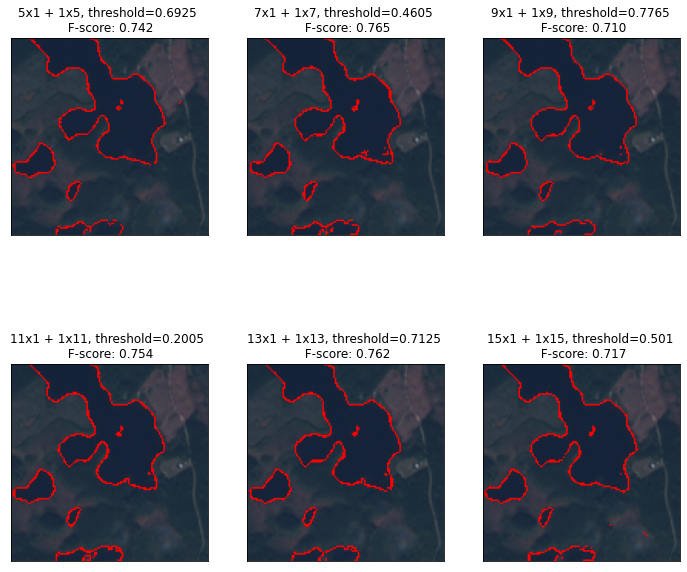

<Figure size 432x288 with 0 Axes>

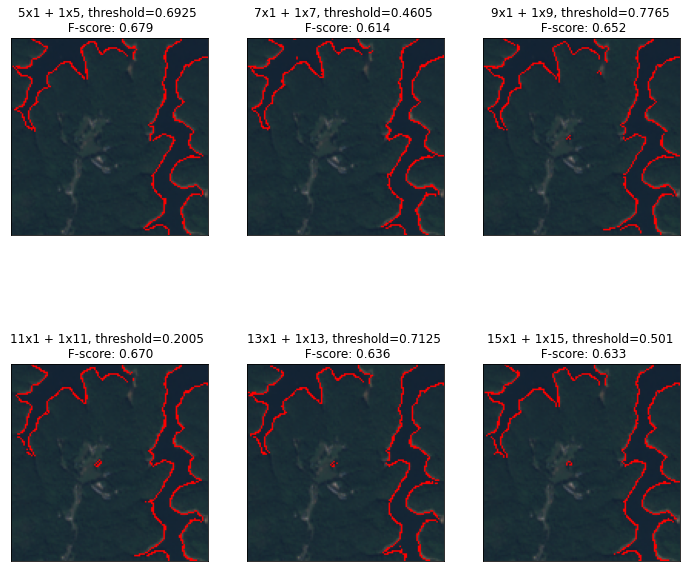

<Figure size 432x288 with 0 Axes>

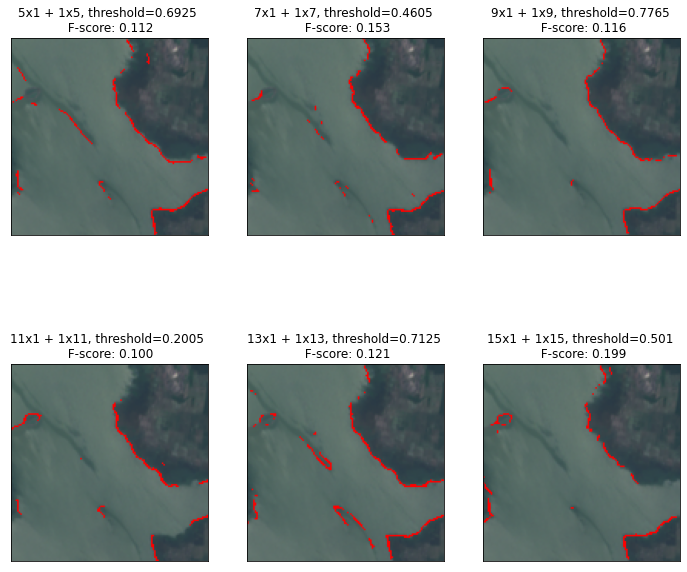

<Figure size 432x288 with 0 Axes>

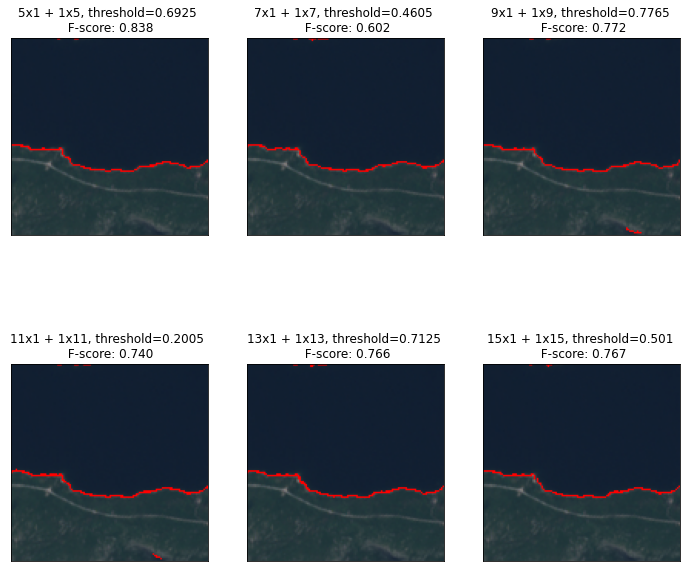

<Figure size 432x288 with 0 Axes>

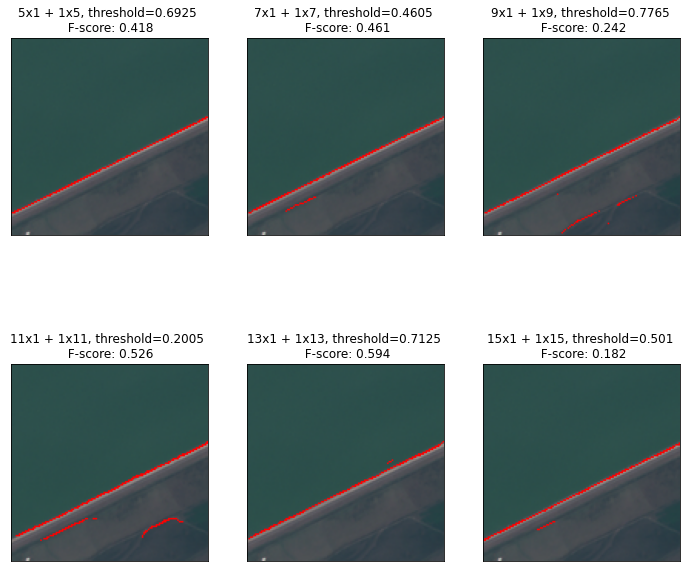

<Figure size 432x288 with 0 Axes>

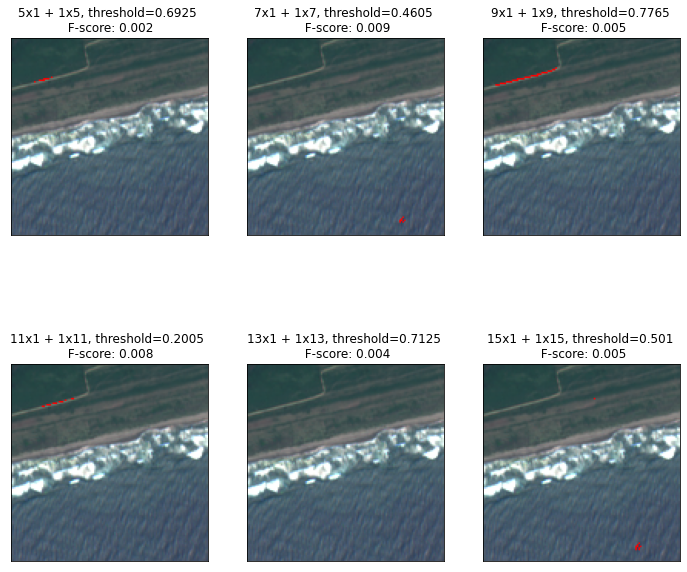

<Figure size 432x288 with 0 Axes>

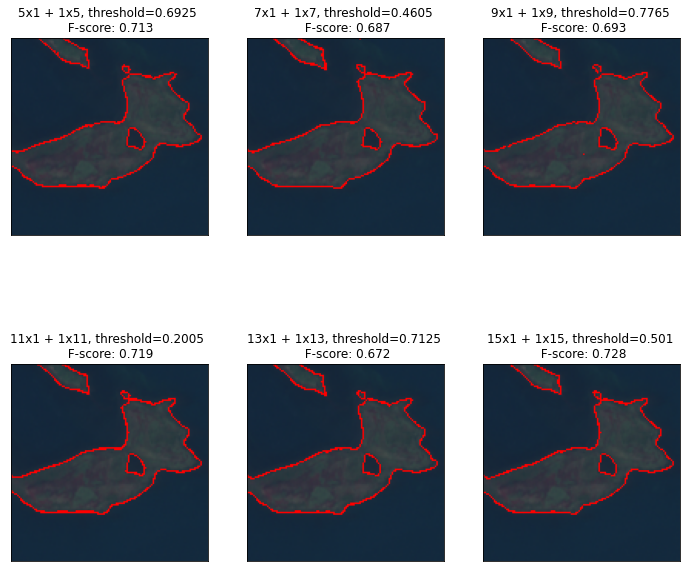

<Figure size 432x288 with 0 Axes>

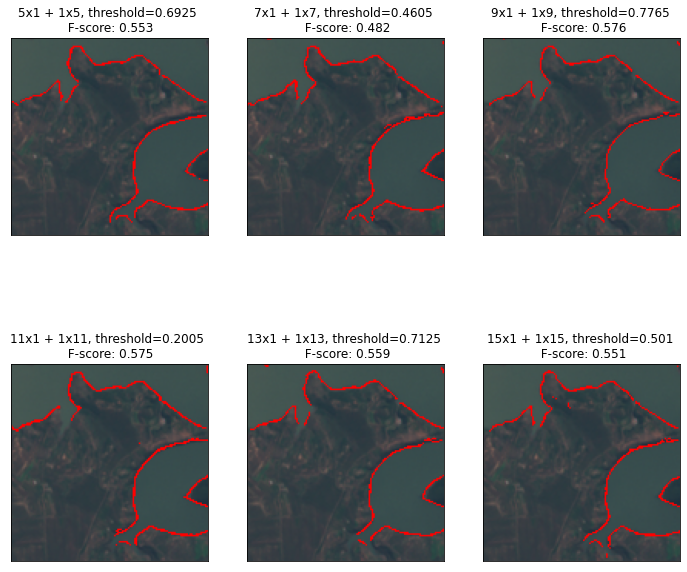

<Figure size 432x288 with 0 Axes>

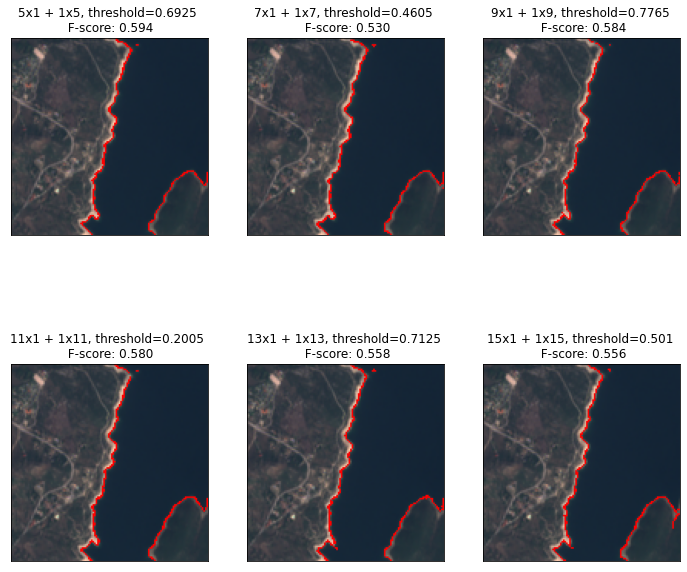

<Figure size 432x288 with 0 Axes>

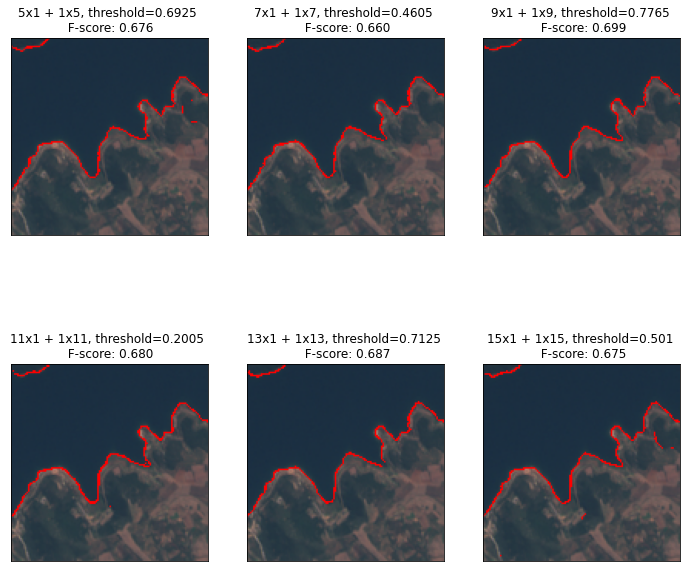

<Figure size 432x288 with 0 Axes>

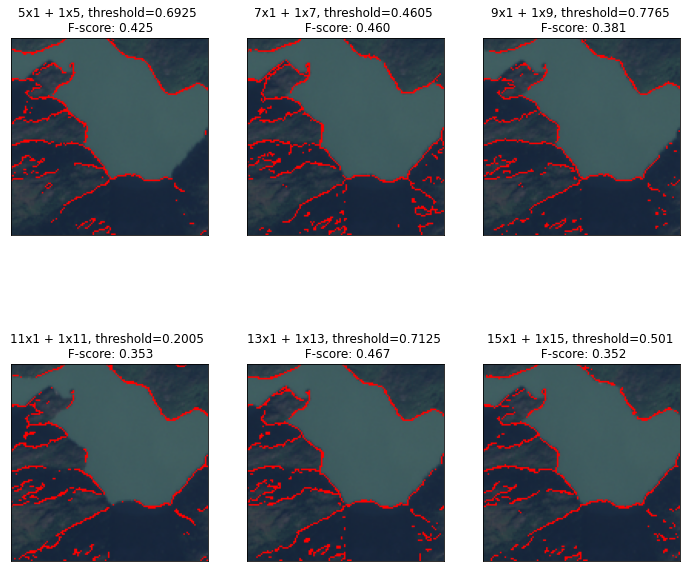

<Figure size 432x288 with 0 Axes>

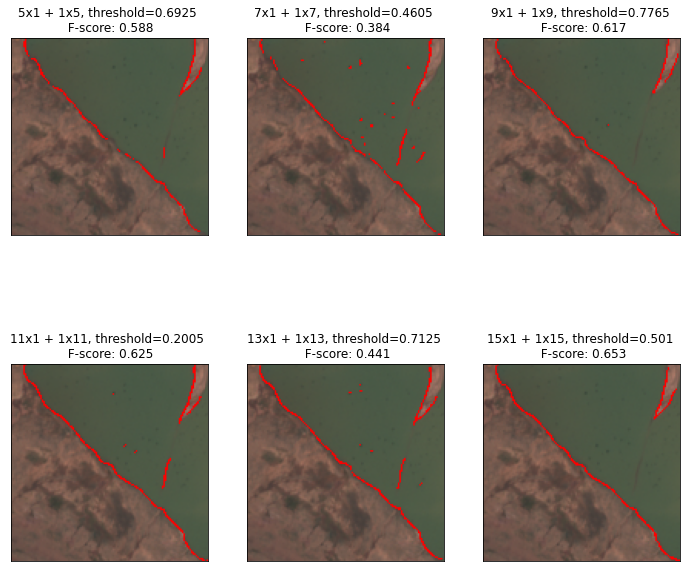

<Figure size 432x288 with 0 Axes>

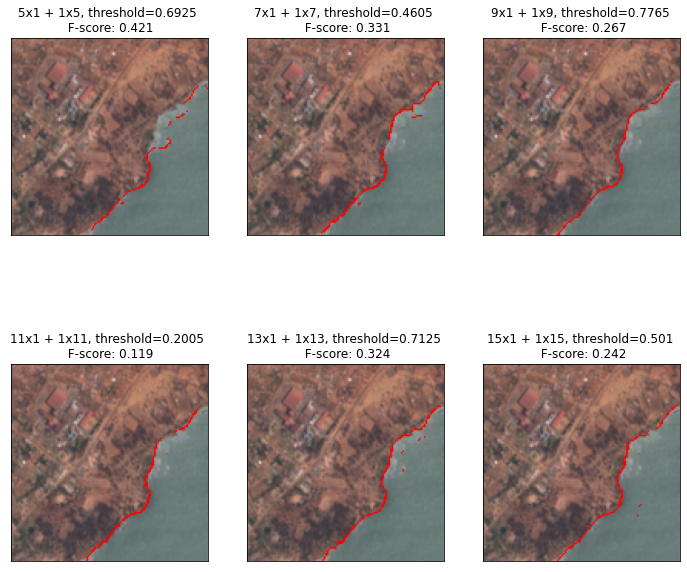

<Figure size 432x288 with 0 Axes>

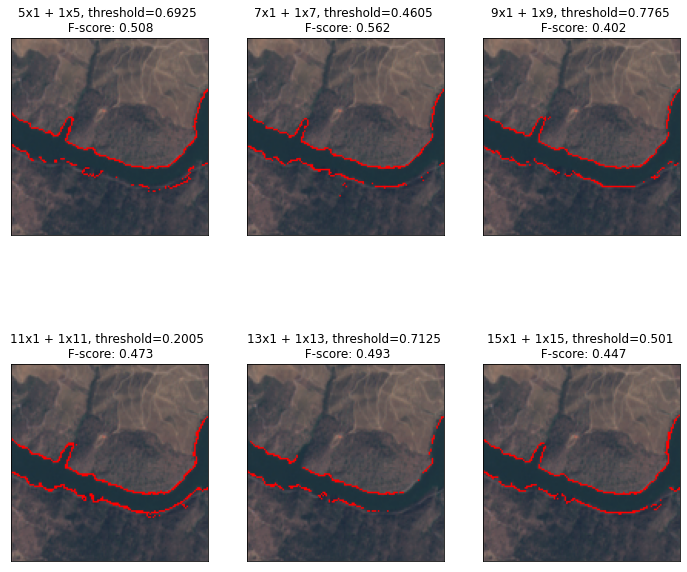

<Figure size 432x288 with 0 Axes>

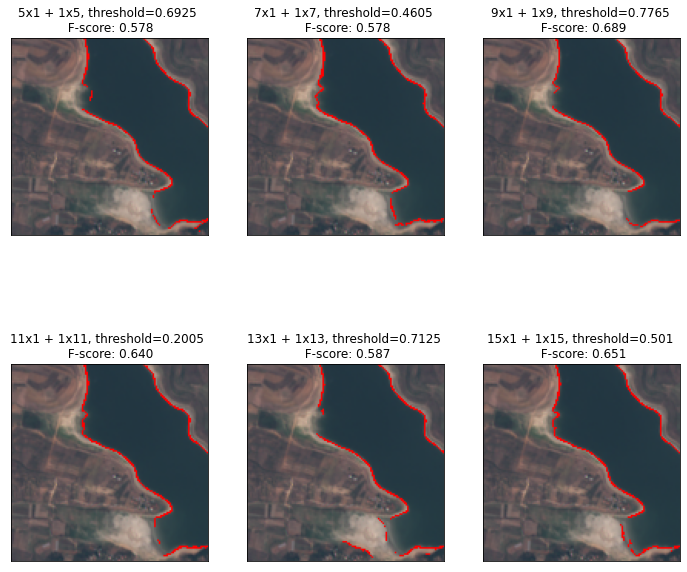

<Figure size 432x288 with 0 Axes>

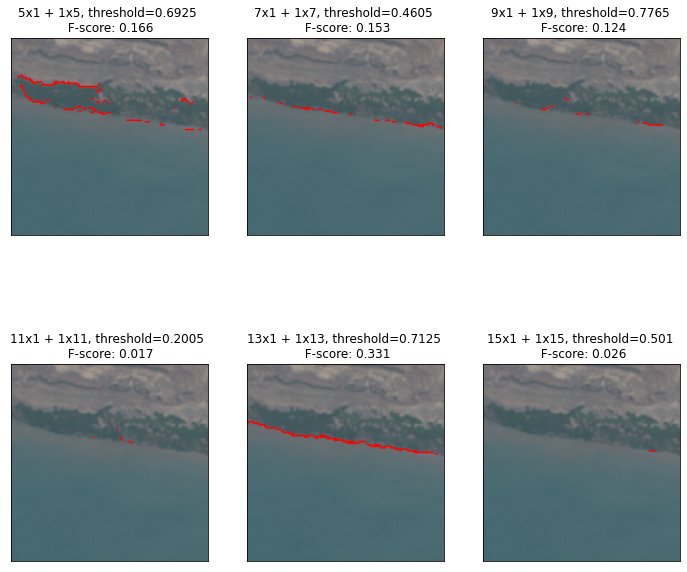

<Figure size 432x288 with 0 Axes>

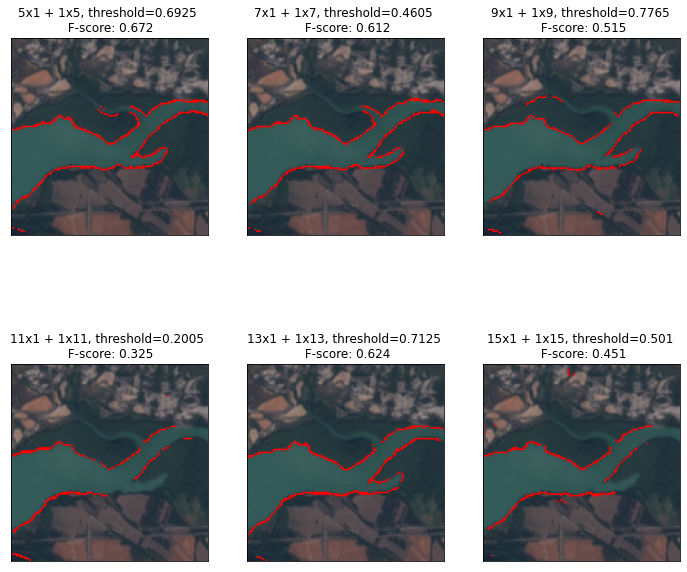

<Figure size 432x288 with 0 Axes>

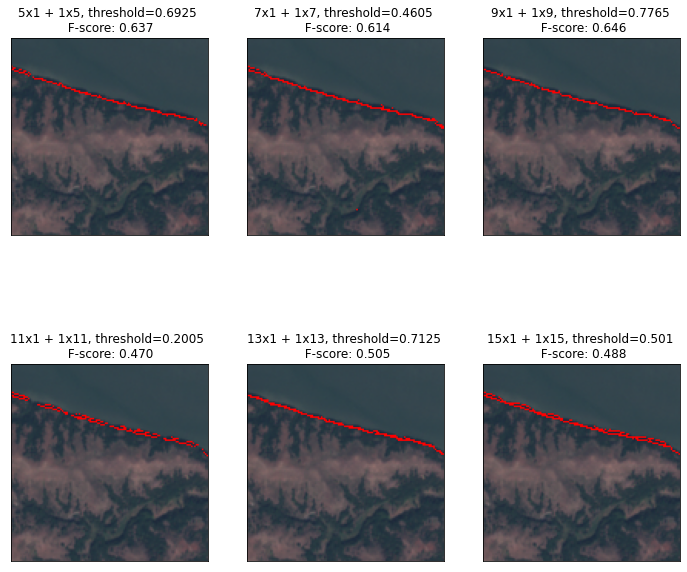

<Figure size 432x288 with 0 Axes>

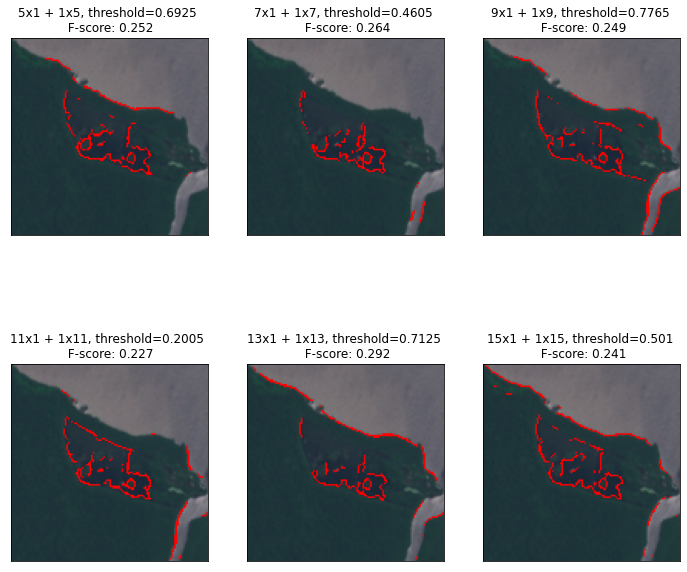

<Figure size 432x288 with 0 Axes>

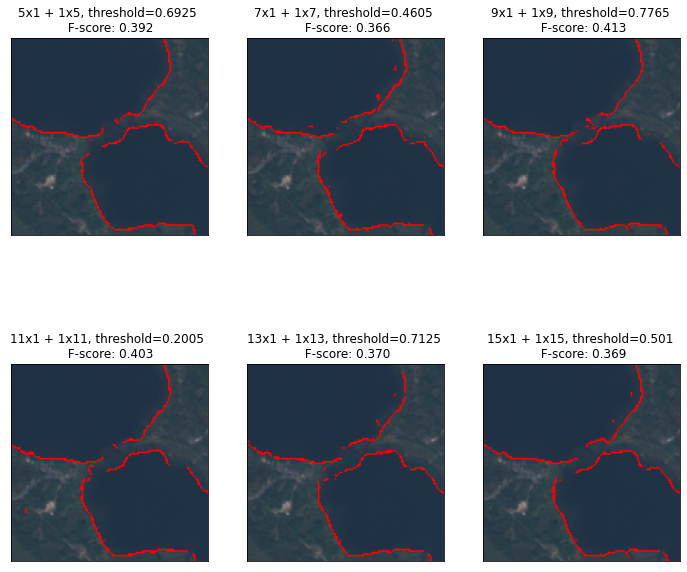

<Figure size 432x288 with 0 Axes>

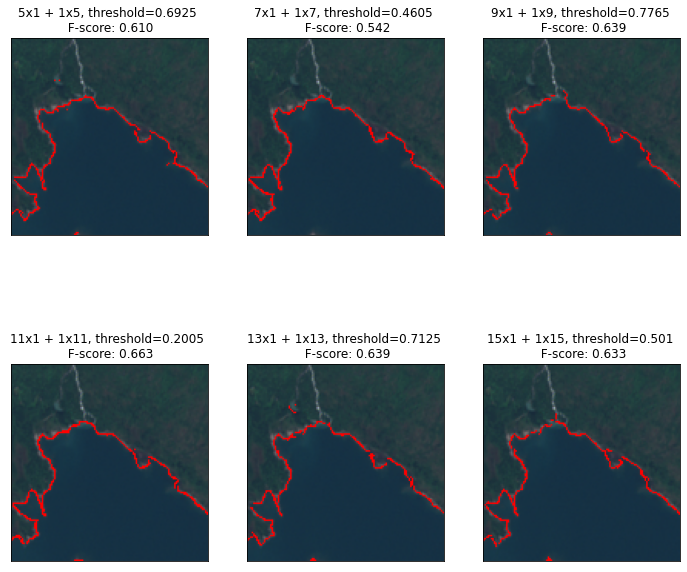

<Figure size 432x288 with 0 Axes>

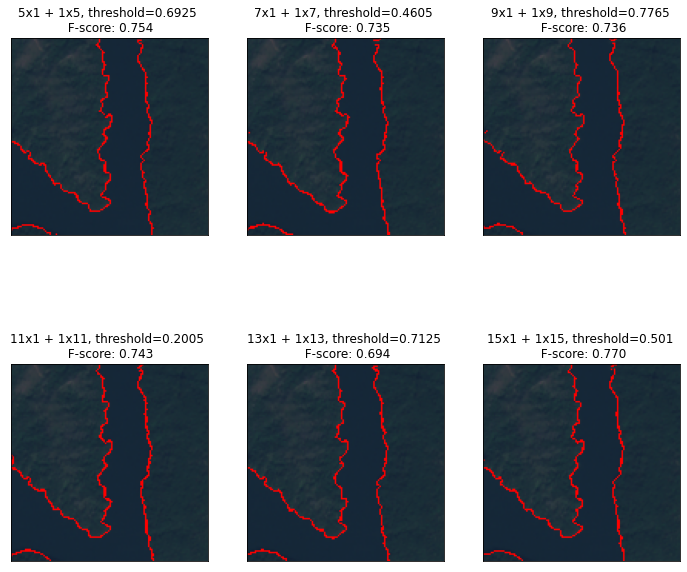

<Figure size 432x288 with 0 Axes>

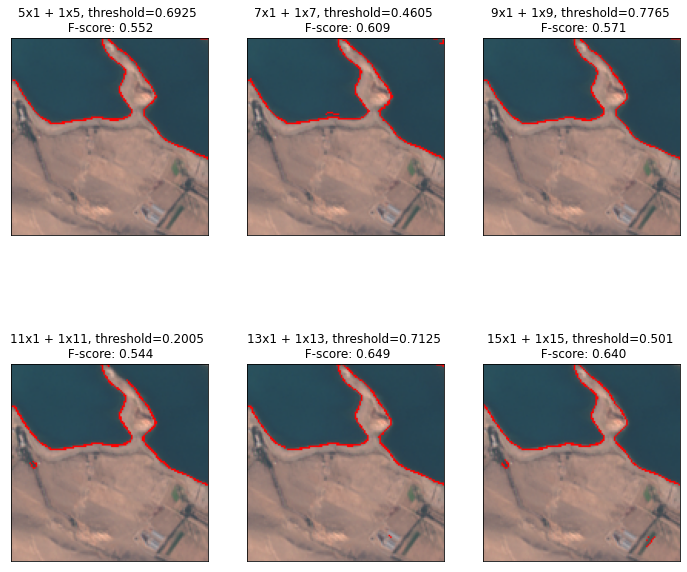

<Figure size 432x288 with 0 Axes>

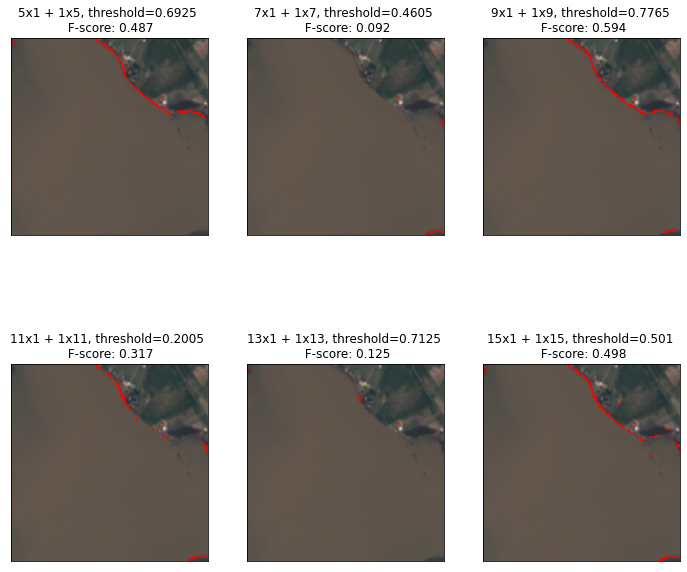

<Figure size 432x288 with 0 Axes>

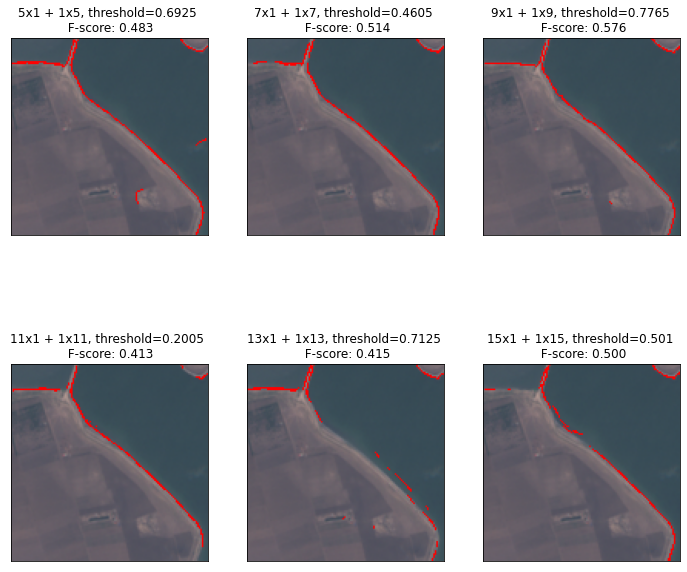

<Figure size 432x288 with 0 Axes>

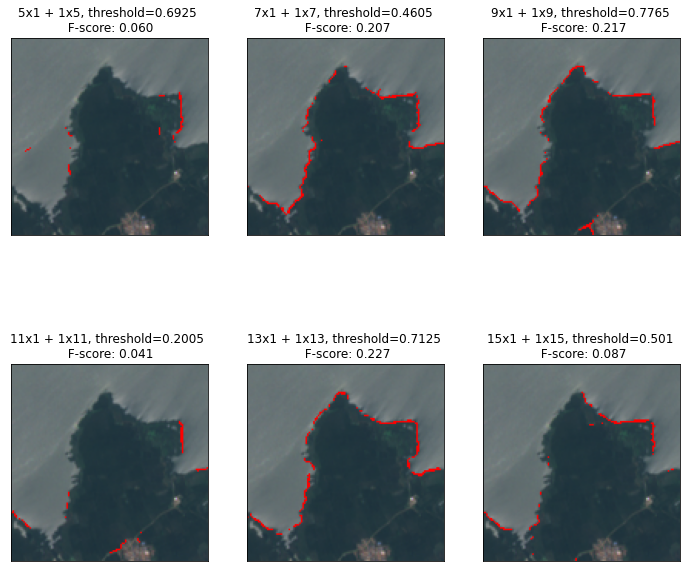

<Figure size 432x288 with 0 Axes>

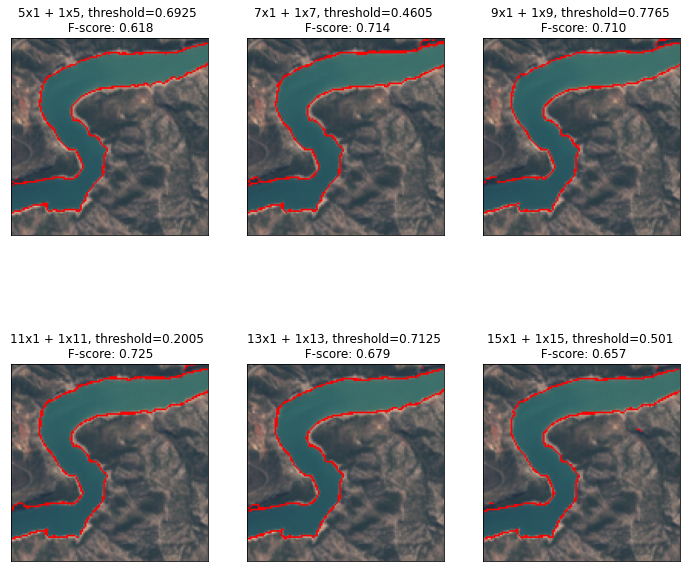

<Figure size 432x288 with 0 Axes>

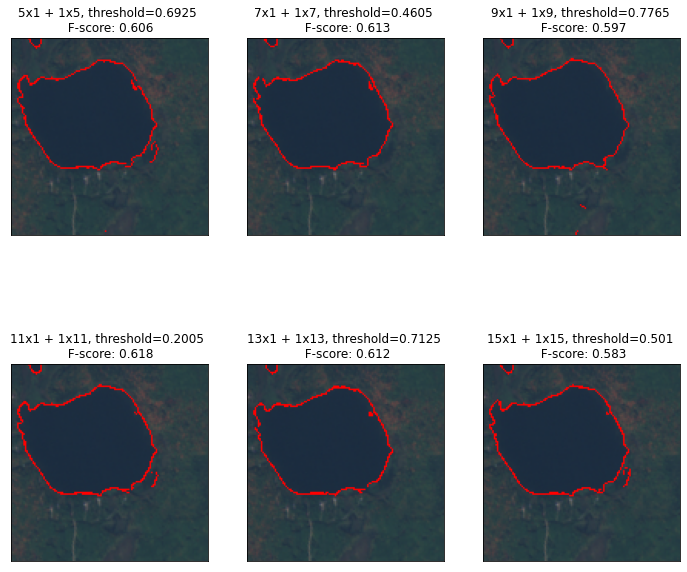

<Figure size 432x288 with 0 Axes>

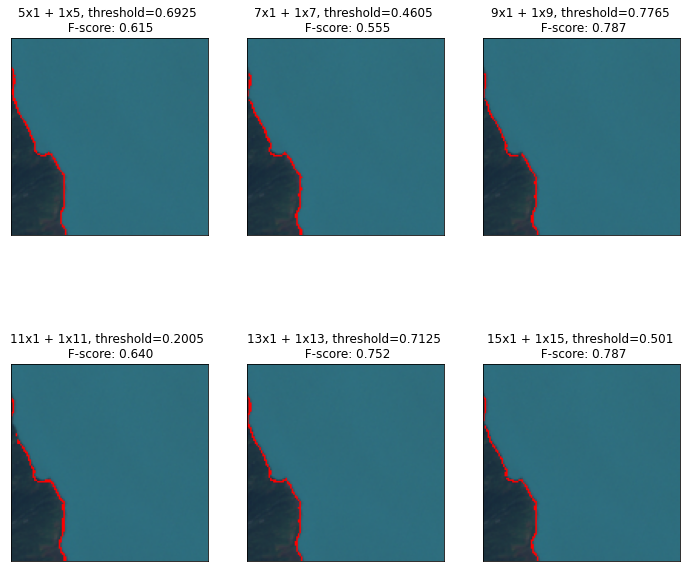

<Figure size 432x288 with 0 Axes>

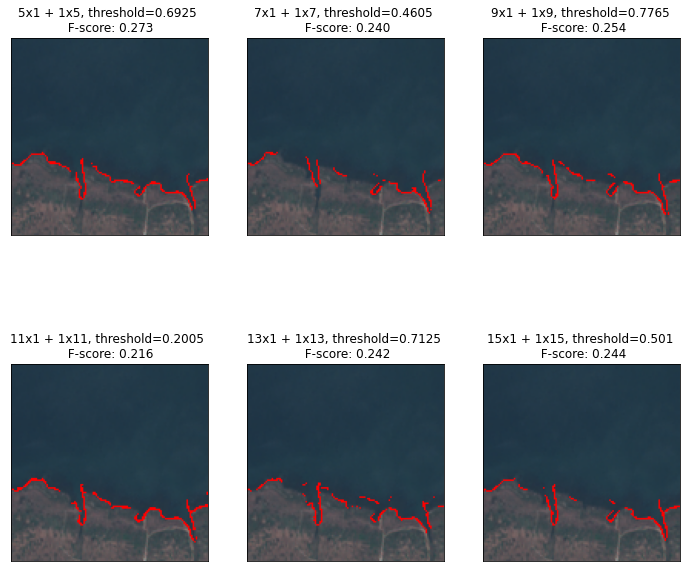

<Figure size 432x288 with 0 Axes>

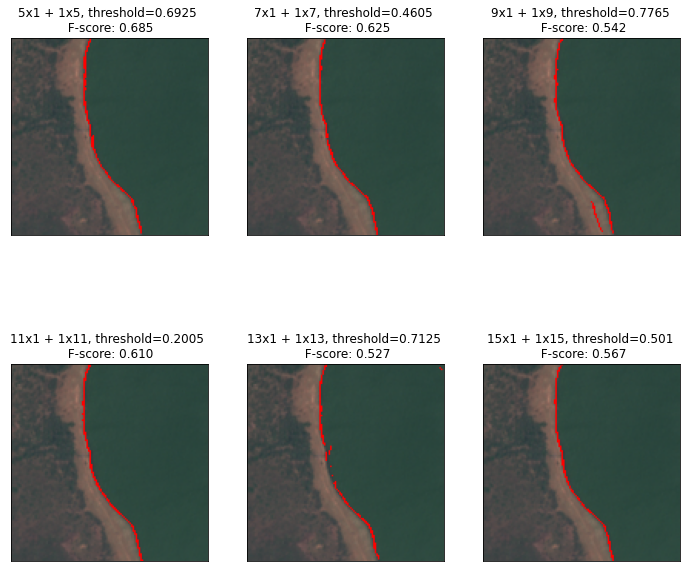

<Figure size 432x288 with 0 Axes>

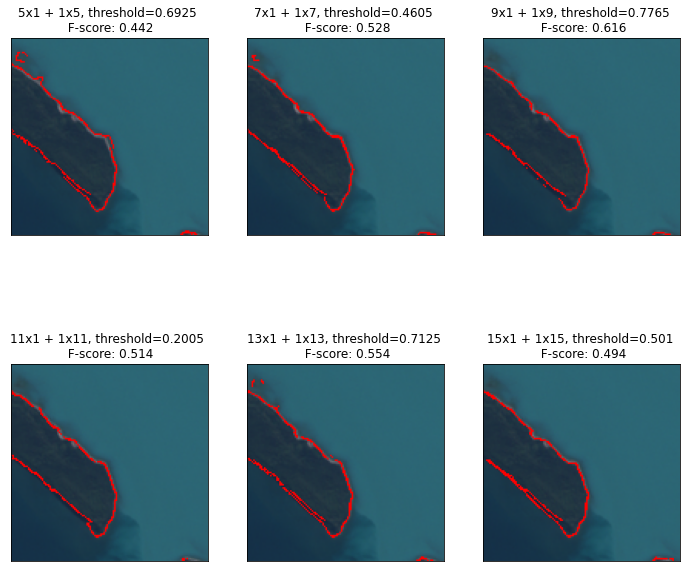

<Figure size 432x288 with 0 Axes>

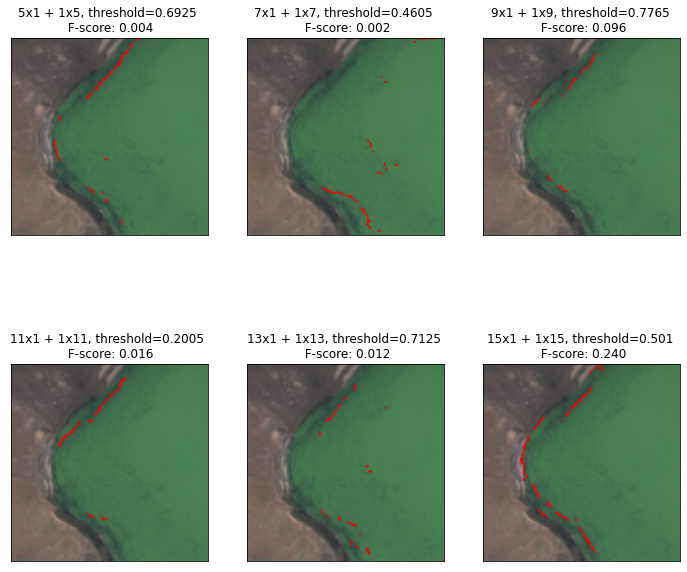

<Figure size 432x288 with 0 Axes>

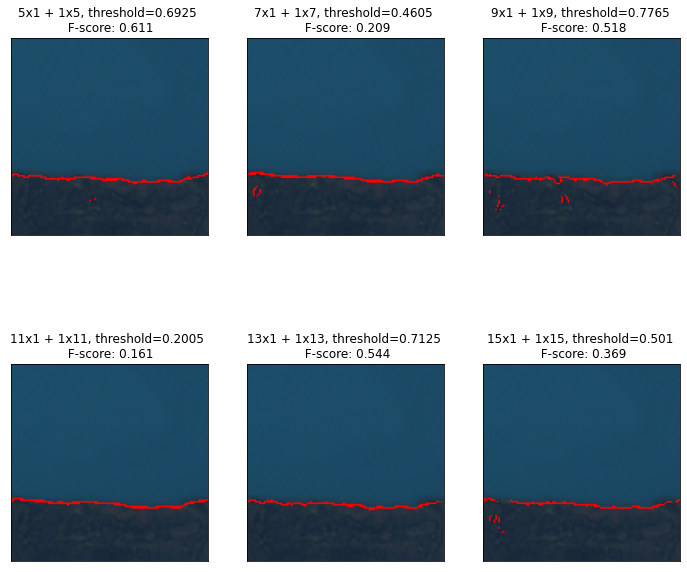

<Figure size 432x288 with 0 Axes>

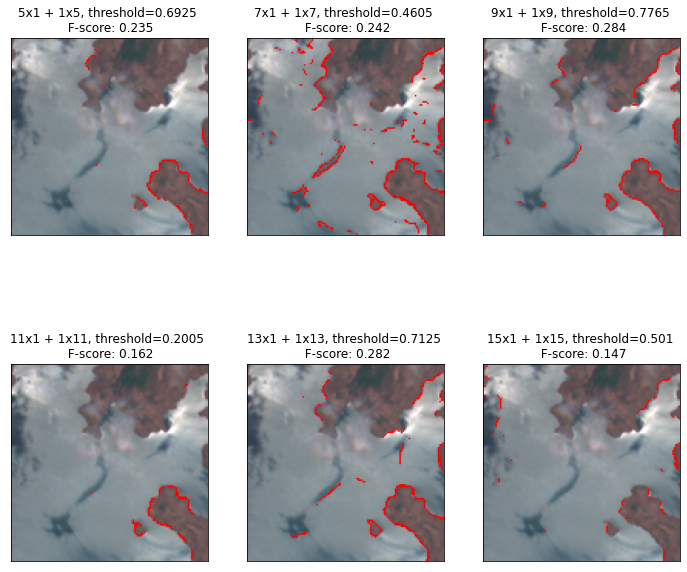

<Figure size 432x288 with 0 Axes>

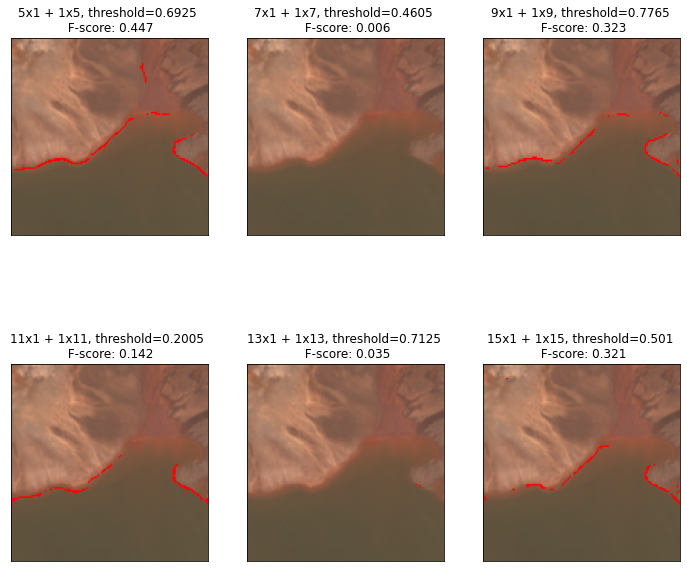

<Figure size 432x288 with 0 Axes>

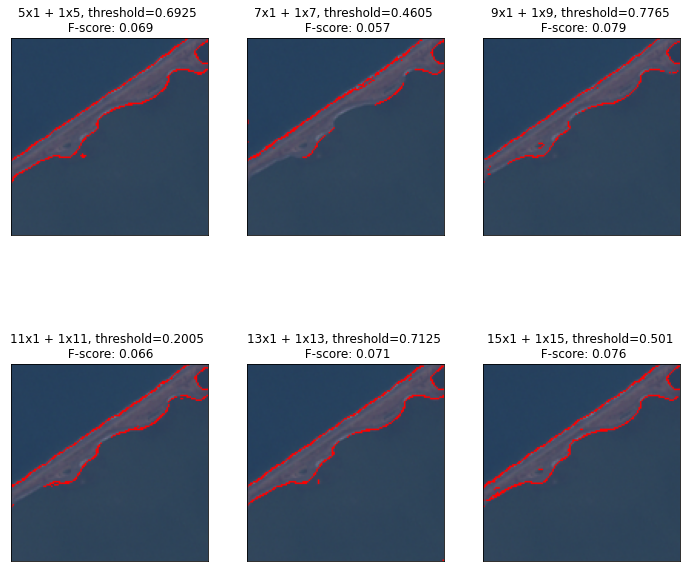

<Figure size 432x288 with 0 Axes>

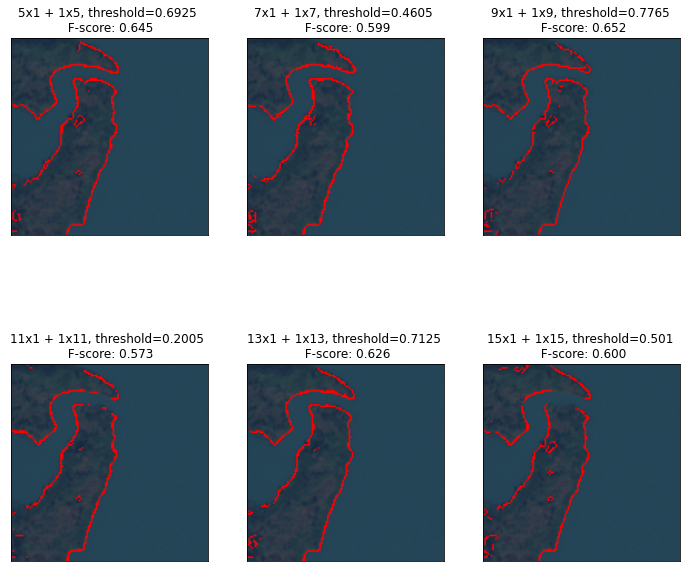

<Figure size 432x288 with 0 Axes>

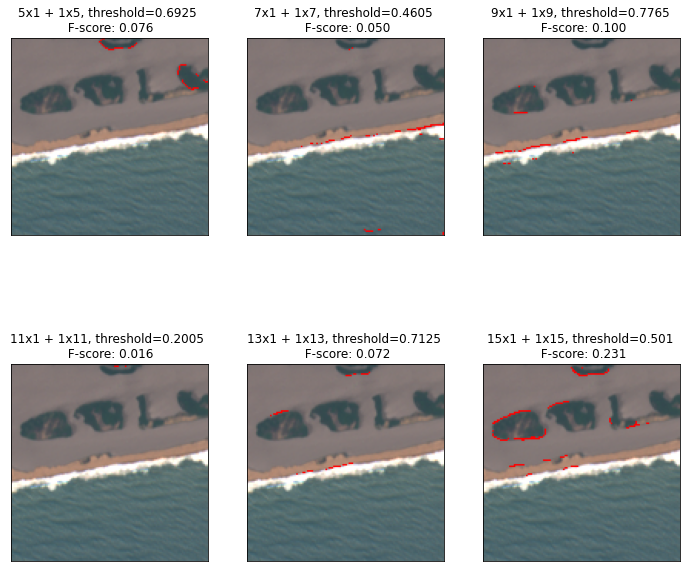

<Figure size 432x288 with 0 Axes>

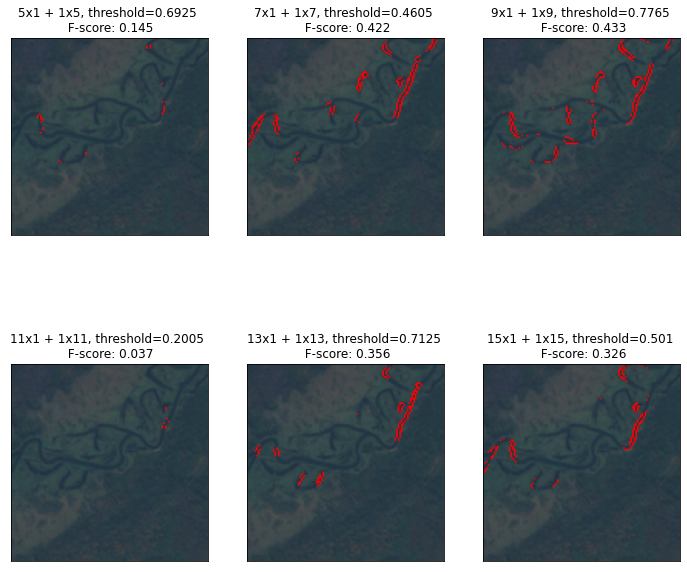

<Figure size 432x288 with 0 Axes>

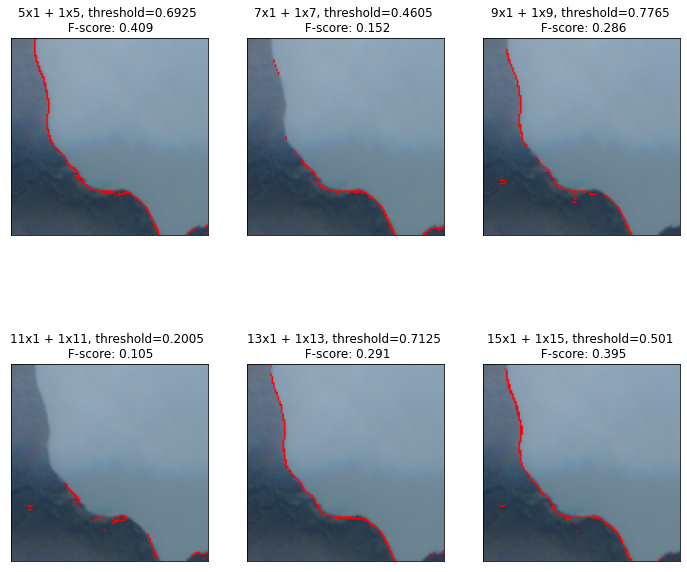

<Figure size 432x288 with 0 Axes>

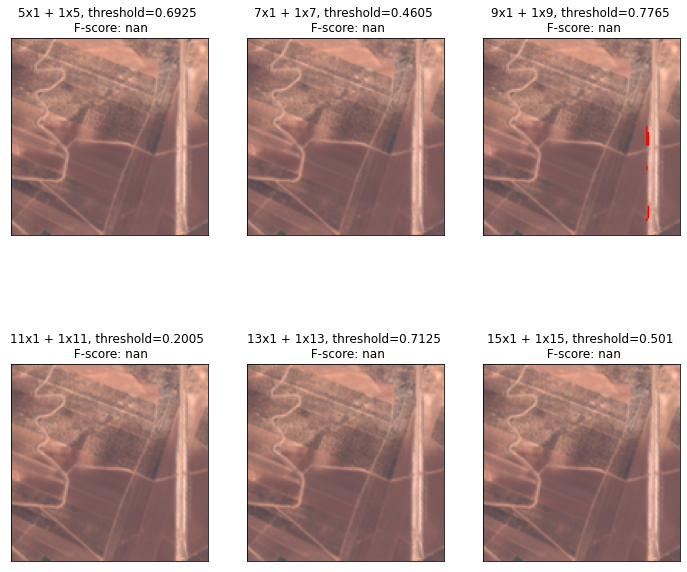

<Figure size 432x288 with 0 Axes>

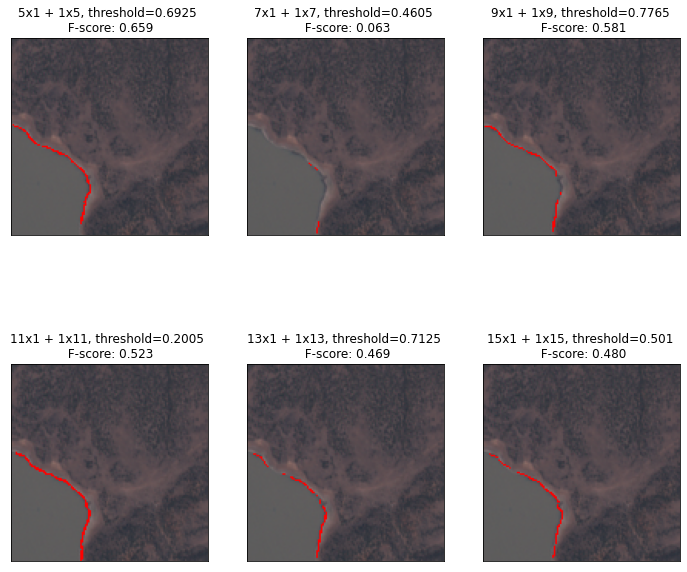

<Figure size 432x288 with 0 Axes>

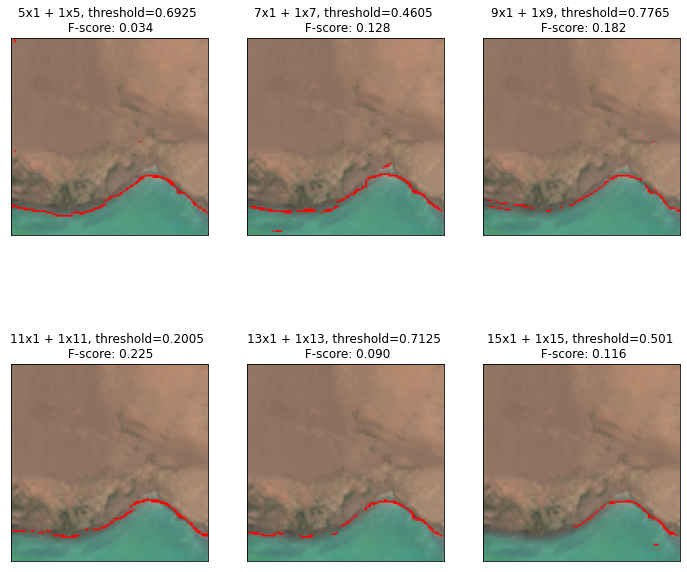

<Figure size 432x288 with 0 Axes>

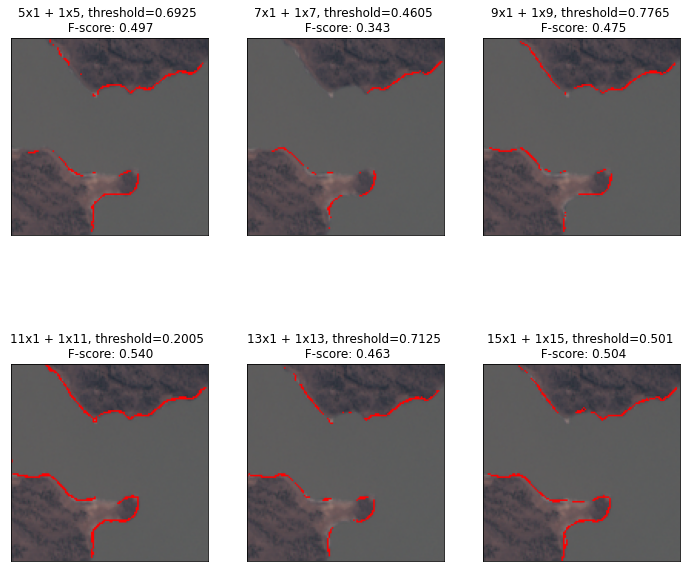

<Figure size 432x288 with 0 Axes>

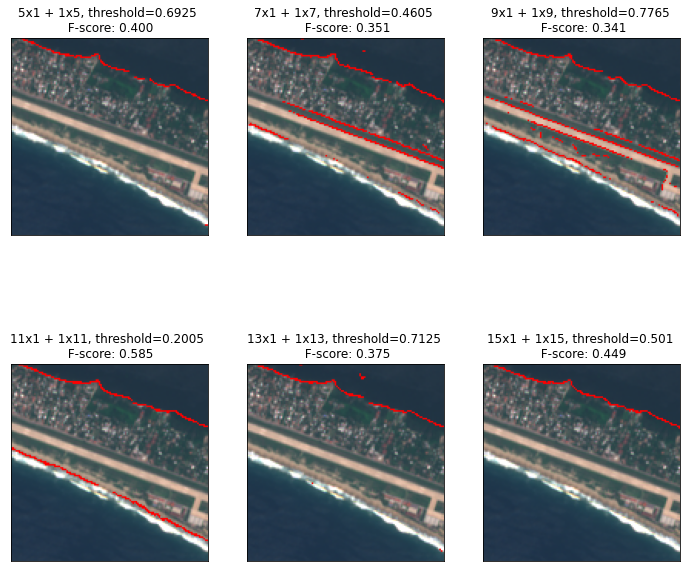

<Figure size 432x288 with 0 Axes>

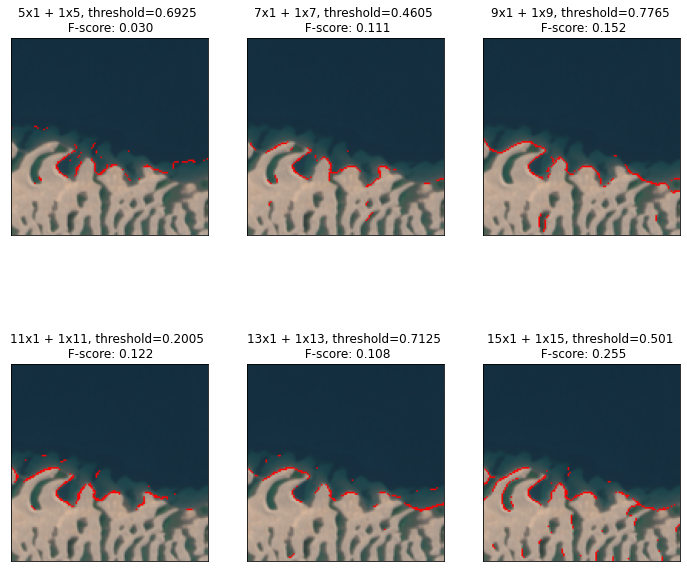

<Figure size 432x288 with 0 Axes>

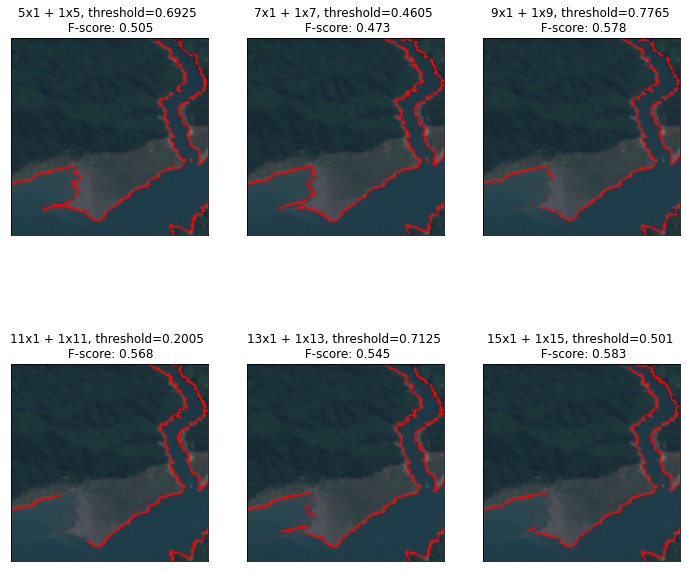

<Figure size 432x288 with 0 Axes>

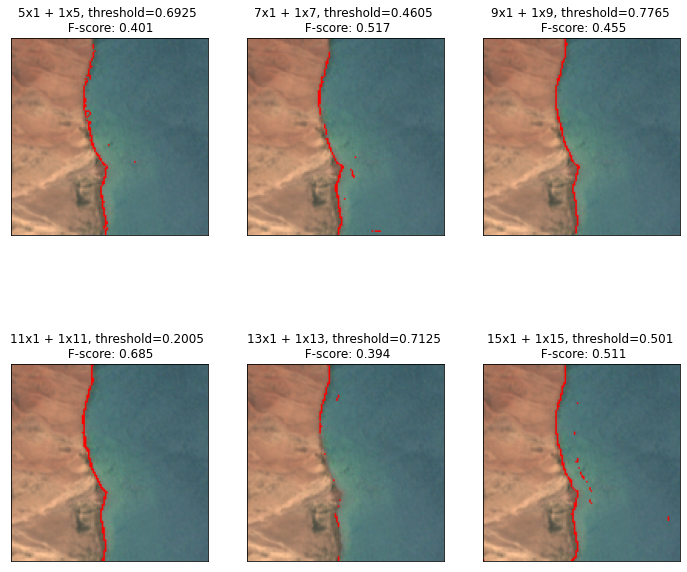

<Figure size 432x288 with 0 Axes>

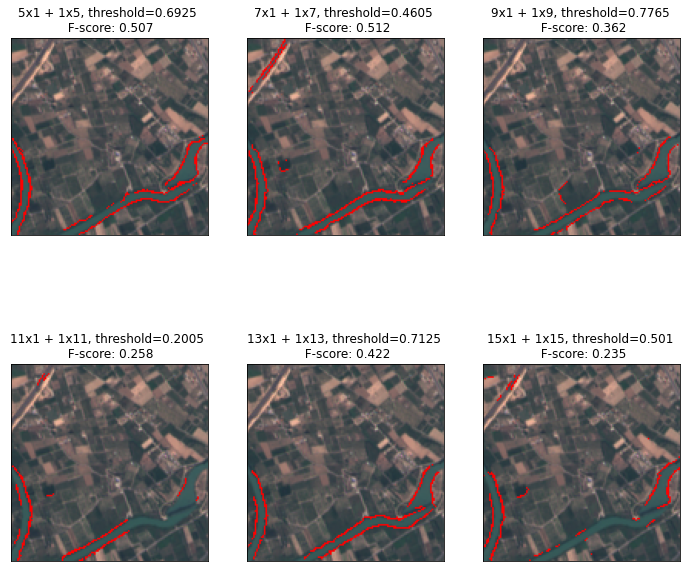

<Figure size 432x288 with 0 Axes>

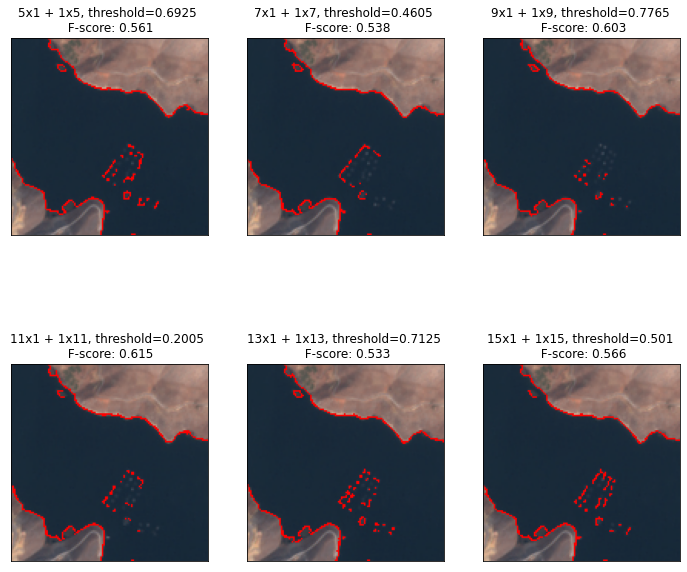

<Figure size 432x288 with 0 Axes>

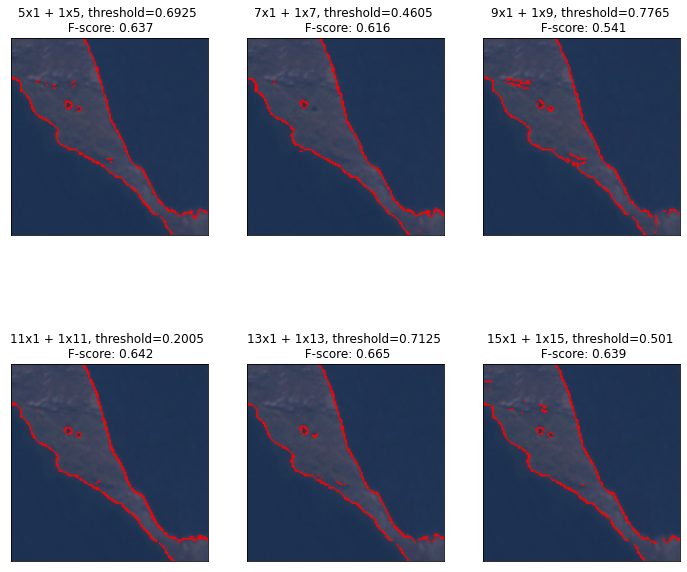

<Figure size 432x288 with 0 Axes>

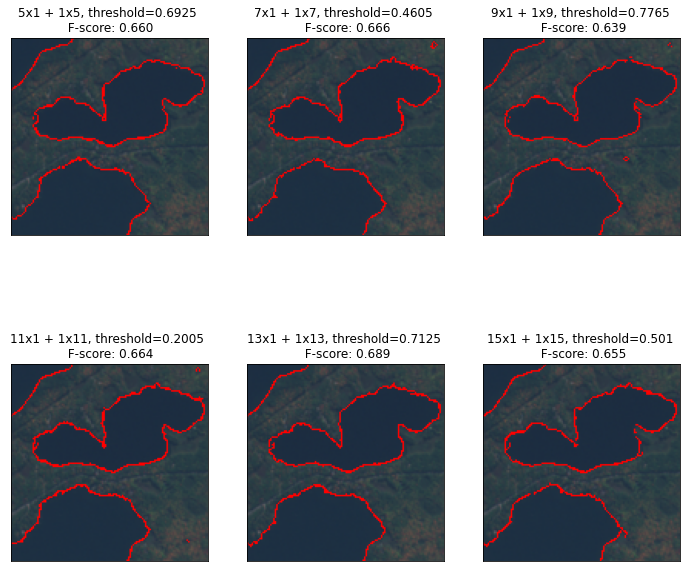

<Figure size 432x288 with 0 Axes>

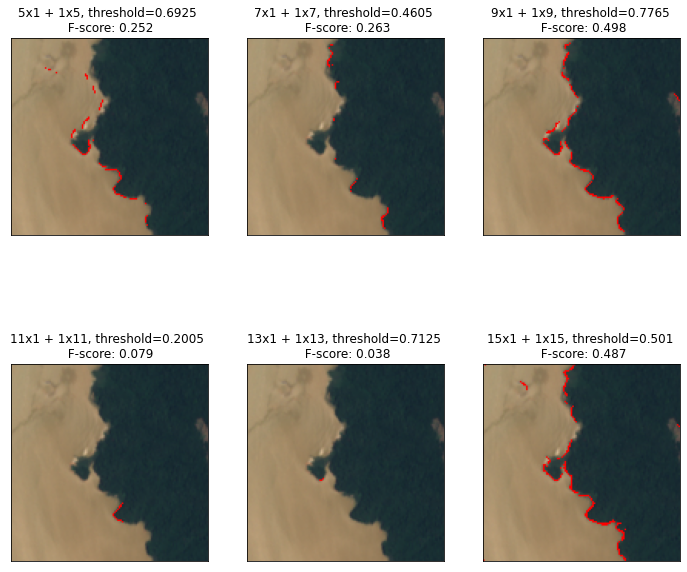

In [61]:
for i in range(len(test_set_NDWI)):

    ix = 1
    plt.figure()
    fig = plt.figure()
    fig.set_size_inches(12,11)
    for _ in range(2):
        for _ in range(3):

#             if ix==6:
#                 continue
#             else:
                threshold = thresholds_final_experiments[ix-1]
                # specify subplot and turn of axis
                x = test_set_NDWI[i].copy()
                y = models_final_experiments[ix-1][i].squeeze()
                z = test_set_gt_NDWI[i]
                
                tp = np.sum(y*(z>threshold)*1)
                tn = np.sum((1-y)*((1-z)>threshold)*1)
                fp = np.sum((1-y)*(z>threshold)*1)
                fn = np.sum((y)*((1-z)>threshold)*1)
                pr  = (tp/(tp+fp))
                rec = (tp/(tp+fn))
                f1  = ((2*pr*rec)/(pr+rec))
            
                ax = plt.subplot(2, 3, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_title(str(ix))
                ax.set_title(f'{list_names_final_experiments[ix-1]}, threshold={threshold} \n F-score: {f1:.3f}')
                # plot filter channel in grayscale
                
                idx = np.where(y>threshold)*1
                x[idx] = [1,0,0]
                plt.imshow(x)

                ix += 1
#     plt.savefig('1.jpg')
#     img_path = r"C:\Users\SMOHA\OneDrive - University of New Orleans\Documents\Research\Notebooks\Model Visualizations\1.jpg"

#     blank_slide_layout = prs.slide_layouts[6]
#     slide = prs.slides.add_slide(blank_slide_layout)
    
#     width = Inches(10)
#     height = Inches(7.5)
#     left = top = Inches(0)
#     pic = slide.shapes.add_picture(img_path, left, top, width, height)